# **Group 4 Final Project**

**Group Member**:Fayez Alharbi, Umesh Makhloga, Marium Mukhtar, Yuri Yu

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation

from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from string import punctuation
import nltk
from nltk.stem.snowball import SnowballStemmer

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import tree
from sklearn.decomposition import TruncatedSVD
import random
random.seed()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Task 1: Create Corpus

In [ ]:
# Setup access to my Google Drive
from google.colab import drive
drive.mount('/content/drive',  force_remount=False)

# Set the working directory
import os
os.chdir('/content/drive/MyDrive/Assignment_Completed/Final Project')

## Read csv to load all the reviews metadata

In [ ]:
# Create the text corpus required to determine the quality of a healthcare provider that serves the Riverside and San Bernardino County using Yelp’s review data

In [ ]:
data_df = pd.read_csv('reviews_and_metadata_all_version1.csv').drop(columns=['Unnamed: 0'])
print(f'Number of rows in the new data frame: {len(data_df)}')
data_df.head(3)

Number of rows in the new data frame: 63743


,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,snippet text,Address,City,State code,zip code,clamed,closed,latitude,longitude,phone
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09


## Save the corpus

In [ ]:
# Save the corpus in a raw file that includes all the reviews and review ratings along with needful metadata

In [ ]:
data_df.to_csv('reviews_with_metadata.csv', index=None)

## Summary of statistics of the corpus:

### Total number of reviews

In [ ]:
print(f"Number of reviews in the final data: {len(data_df)}")

Number of reviews in the final data: 63743


In [ ]:
print(f"Shape of the final data (Number of reviews, number of columns): {data_df.shape}")

Shape of the final data (Number of reviews, number of columns): (63743, 20)


### Distributions (mean, max, and min) of review ratings and number of reviews by business.

In [ ]:
# unique reviews we have per business.
data_df.groupby(['Business ID '])['Business ID '].count()

Business ID 
24-7-care-at-home-westminster-2                                    7
4-ever-green-collective-riverside                                  9
a-doctors-weight-loss-clinic-moreno-valley-2                      13
a-gobaud-orthopaedic-medical-clnc-and-bck-trtmnt-ctr-montclair     1
a-healing-within-palm-desert                                      14
                                                                  ..
yusufaly-imdad-md-wildomar                                        19
yvonne-d-sylva-md-corona                                          49
zacher-judith-md-palm-desert                                       5
zeid-k-kayali-md-rialto-2                                         11
zosima-b-cariño-gateb-md-indio-2                                   1
Name: Business ID , Length: 2468, dtype: int64

In [ ]:
# Statistical distribution of the reviews ratings and number of reviews by business
data_df.groupby(['Business ID '])['Business ID '].count().describe()

count    2468.000000
mean       25.827796
std        49.925814
min         1.000000
25%         4.000000
50%        10.000000
75%        26.000000
max       633.000000
Name: Business ID , dtype: float64

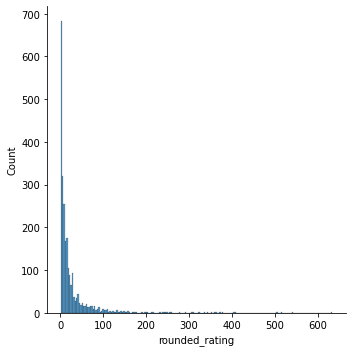

In [ ]:
sns.displot(data_df.groupby(['Business ID '])['rounded_rating'].count())

In [ ]:
# A strongly skewed distribution. A small number of businesses have a relatively large number of reviews, while most businesses have relatively few. The max (633) is so much 
# bigger than the mean (26) that it skews the statistics significantly. Maybe more helpful is to note that the 50% percentile number of reviews is only 10 and the 25% percentile is 4, 
# those counts are significantly less than the average.

# This might present some interesting challenges for machine learning as we will have significantly more data for some businesses then we do for others.

# Task 2: Text preprocessing


### Tokenization and normalization

In [ ]:
df = pd.read_csv("/Users/Yuri/MyData/reviews_with_metadata.csv")
df.head(3)

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,snippet text,Address,City,State code,zip code,clamed,closed,latitude,longitude,phone
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09


In [ ]:
!pip install contractions
import contractions

def contraction_expansion(df):
  expanded_word = []    
  for word in df.split():
    expanded_word.append(contractions.fix(word))     
  return  ' '.join(expanded_word)

In [ ]:
df['review_content_expanded'] = df['review_content'].apply(contraction_expansion)

In [ ]:
df['review_content_expanded_token'] = df['review_content_expanded'].apply(wordpunct_tokenize)

In [ ]:
df['review_content_tagged'] = df['review_content_expanded_token'].apply(nltk.pos_tag)

In [ ]:
def lemmatize_POS (tagged_columns):
  wnl = WordNetLemmatizer()
  text=[]
  for word, tag in tagged_columns:
    if tag.startswith('NN'):
      token = wnl.lemmatize(word, pos='n')
    elif tag.startswith('VB'):
      token = wnl.lemmatize(word, pos='v')
    elif tag.startswith('JJ'):
      token = wnl.lemmatize(word, pos='a')
    elif tag.startswith('RB'):
      token = wnl.lemmatize(word, pos='r')
    else:
      token = word
    text.append(token)
  return text

In [ ]:
df['review_content_lemma'] = df['review_content_tagged'].apply(lemmatize_POS)

In [ ]:
def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] 
  tokens = [token for token in tokens if not token.isdigit()] 
  tokens = [token for token in tokens if token not in punctuation] 
  mystopwords = set(stopwords.words("english")) 
  tokens = [token for token in tokens if token not in mystopwords] 
  tokens = [word for word in tokens if len(word)>=3] 
  return tokens

In [ ]:
df['review_content_pre'] = df['review_content_lemma'].apply(preprocessing)

### summary review statistics of the processed text

#### For the entire corpus

In [ ]:
df_stats_raw=df.iloc[:,:25]
df_stats_raw.head(3)

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,...,clamed,closed,latitude,longitude,phone,review_content_expanded,review_content_expanded_token,review_content_tagged,review_content_lemma,review_content_pre
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,1,0,34.101295,-117.633995,9.099853e+09,Best guy to check what is going on up there!!!...,"[Best, guy, to, check, what, is, going, on, up...","[(Best, JJS), (guy, NN), (to, TO), (check, VB)...","[Best, guy, to, check, what, be, go, on, up, t...","[best, guy, check, !!!, many, many, year, alwa..."
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,1,0,34.101295,-117.633995,9.099853e+09,This review does not reflect what I think of t...,"[This, review, does, not, reflect, what, I, th...","[(This, DT), (review, NN), (does, VBZ), (not, ...","[This, review, do, not, reflect, what, I, thin...","[review, reflect, think, business, however, re..."
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,1,0,34.101295,-117.633995,9.099853e+09,I have been having issues with my liver/stomac...,"[I, have, been, having, issues, with, my, live...","[(I, PRP), (have, VBP), (been, VBN), (having, ...","[I, have, be, have, issue, with, my, liver, /,...","[issue, liver, stomach, couple, year, real, so..."


In [ ]:
# create a function for counting the tokens
def count_tokens(text):
    return len(text)

# create a function for lexical diversity
def lexical_diversity(text):
    return len(text)/len(set(text))

from nltk import FreqDist



In [ ]:
df_table=df_stats_raw.iloc[:,[0,6,7,21,24]]

# number of tokens from raw text
df_table['review_length']=df_stats_raw.loc[:,'review_content_expanded_token'].apply(count_tokens)

# number of unique tokens from raw text
df_table['unique_raw']=df_stats_raw.loc[:,'review_content_expanded_token'].apply(FreqDist)
df_table['unique_raw']=df_table['unique_raw'].apply(len)

# lexical diversity from raw text
df_table['lexical_diversity_raw']=df_stats_raw.loc[:,'review_content_expanded_token'].apply(lexical_diversity) 

# number of tokens after normalization
df_table['review_length_n']=df_stats_raw.loc[:,'review_content_pre'].apply(count_tokens)

# number of unique tokens after normalization
df_table['unique_raw_n']=df_stats_raw.loc[:,'review_content_pre'].apply(FreqDist)
df_table['unique_raw_n']=df_table['unique_raw_n'].apply(len)

# lexical diversity after normalization
df_table['lexical_diversity_raw_n']=df_stats_raw.loc[:,'review_content_pre'].apply(lexical_diversity) 

In [ ]:
df_table.columns=['Username','Business ID','Business Name','Raw Review','Normalized Review'
                  ,'Raw Review Length','Raw Review Unique Token','Raw Review Lexical Diversity'
                  ,'Normalized Review Length','Normalized Review Unique Token','Normalized Review Lexical Diversity']
df_table.head(3)

,Username,Business ID,Business Name,Raw Review,Normalized Review,Raw Review Length,Raw Review Unique Token,Raw Review Lexical Diversity,Normalized Review Length,Normalized Review Unique Token,Normalized Review Lexical Diversity
0,Gregory P.,chuang-t-hung-md-upland,Chuang T. Hung MD,"[Best, guy, to, check, what, is, going, on, up...","[best, guy, check, !!!, many, many, year, alwa...",31,27,1.148148,13,11,1.181818
1,Corvetta M.,chuang-t-hung-md-upland,Chuang T. Hung MD,"[This, review, does, not, reflect, what, I, th...","[review, reflect, think, business, however, re...",135,75,1.800000,55,35,1.571429
2,Micky B.,chuang-t-hung-md-upland,Chuang T. Hung MD,"[I, have, been, having, issues, with, my, live...","[issue, liver, stomach, couple, year, real, so...",296,162,1.827160,119,94,1.265957


In [ ]:
df_table.to_csv('task2_stats.csv', encoding = 'utf-8-sig')

#### For each business

In [ ]:
df_agg_raw=df[['Business ID ','rounded_rating','doctorID','Name','Business Category','review_content_expanded','review_content_pre']]
df_agg_raw.rename({'Business ID ':'Business ID'}, axis=1,inplace=True)

In [ ]:
df_agg_raw['review_content_pre_str']=df_agg_raw['review_content_pre'].apply (lambda row: ' '.join(str(x) for x in row))
df_agg_raw = df_agg_raw.drop('review_content_pre', axis=1)
df_agg_raw.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content_expanded,review_content_pre_str
0,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",Best guy to check what is going on up there!!!...,best guy check !!! many many year always recom...
1,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",This review does not reflect what I think of t...,review reflect think business however reflect ...
2,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",I have been having issues with my liver/stomac...,issue liver stomach couple year real solution ...


In [ ]:
df1_raw=df_agg_raw.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'])['review_content_expanded'].apply(lambda x:x.str.cat(sep=' ')).reset_index()
df2_raw=df_agg_raw.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'])['review_content_pre_str'].apply(lambda x:x.str.cat(sep=' ')).reset_index()
df_agg_raw=df1_raw.merge(df2_raw, left_on=['Business ID','rounded_rating','doctorID','Name','Business Category'], right_on=['Business ID','rounded_rating','doctorID','Name','Business Category'])
df_agg_raw['review_content_tokens']=df_agg_raw['review_content_expanded'].apply(wordpunct_tokenize)
df_agg_raw['review_content_pre_tokens']=df_agg_raw['review_content_pre_str'].apply(wordpunct_tokenize)
df_agg_raw.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content_expanded,review_content_pre_str,review_content_tokens,review_content_pre_tokens
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[A, great, Home, health, service, located, rig...","[great, home, health, service, locate, right, ..."
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective rubidoux blvd riverside ...,"[4, EVER, GREEN, COLLECTIVE, 2781, Rubidoux, B...","[ever, green, collective, rubidoux, blvd, rive..."
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have re...,doctor brysk staff great recommend friend work...,"[Doctor, Brysk, and, her, staff, is, great, .,...","[doctor, brysk, staff, great, recommend, frien..."


In [ ]:
df_table_agg=df_agg_raw.iloc[:,[0,3,4,7,8]]

# number of tokens from raw text
df_table_agg['review_length']=df_agg_raw.loc[:,'review_content_tokens'].apply(count_tokens)

# number of unique tokens from raw text
df_table_agg['unique_raw']=df_agg_raw.loc[:,'review_content_tokens'].apply(FreqDist)
df_table_agg['unique_raw']=df_table_agg['unique_raw'].apply(len)

# lexical diversity from raw text
df_table_agg['lexical_diversity_raw']=df_agg_raw.loc[:,'review_content_tokens'].apply(lexical_diversity) 

# number of tokens after normalization
df_table_agg['review_length_n']=df_agg_raw.loc[:,'review_content_pre_tokens'].apply(count_tokens)

# number of unique tokens after normalization
df_table_agg['unique_raw_n']=df_agg_raw.loc[:,'review_content_pre_tokens'].apply(FreqDist)
df_table_agg['unique_raw_n']=df_table_agg['unique_raw_n'].apply(len)

# lexical diversity after normalization
df_table_agg['lexical_diversity_raw_n']=df_agg_raw.loc[:,'review_content_pre_tokens'].apply(lexical_diversity) 

In [ ]:
df_table_agg.columns=['Business ID','Business Name','Business Category','Raw Review','Normalized Review'
                  ,'Raw Review Length','Raw Review Unique Token','Raw Review Lexical Diversity'
                  ,'Normalized Review Length','Normalized Review Unique Token','Normalized Review Lexical Diversity']
df_table_agg.head(3)

,Business ID,Business Name,Business Category,Raw Review,Normalized Review,Raw Review Length,Raw Review Unique Token,Raw Review Lexical Diversity,Normalized Review Length,Normalized Review Unique Token,Normalized Review Lexical Diversity
0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","[A, great, Home, health, service, located, rig...","[great, home, health, service, locate, right, ...",692,298,2.322148,289,182,1.587912
1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","[4, EVER, GREEN, COLLECTIVE, 2781, Rubidoux, B...","[ever, green, collective, rubidoux, blvd, rive...",1374,579,2.373057,613,371,1.652291
2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","[Doctor, Brysk, and, her, staff, is, great, .,...","[doctor, brysk, staff, great, recommend, frien...",957,397,2.410579,393,237,1.658228


In [ ]:
df_table_agg.to_csv('task2_stats_agg.csv', encoding = 'utf-8-sig')

# Task 3: Data understanding and preparation

#### Identify any potential issues

In [ ]:
df['review_content_pre'][0]

['best',
 'guy',
 'check',
 '!!!',
 'many',
 'many',
 'year',
 'always',
 'recommend',
 'team',
 'thanks',
 'doc',
 '!!!']

In [ ]:
df['review_content_pre'][43430][-31:]

['evade',
 'responsibility非常不好的体验',
 '我老婆在这里生的孩子',
 '我的医生在36周就转了资料给医院',
 '但是医院从来没跟我们核实过资料信息',
 '我们提交了自己的保险',
 '可是因为医院的不负责任',
 '没有告诉我们他们是否接受我的保险',
 '没有履行他们的责任',
 '连最基本的资料都不核对',
 '这是对产妇的不负责',
 '也是他们工作的不重视',
 '这种连基本工作都做不好的医院',
 '你们敢把生命交给他们吗',
 '不出事没问题',
 '出事了那有多少麻烦等着你',
 '因为他们不告知我们的保险不接受',
 '就同样接受生子预定的情况下',
 '给我们造成了他们是接受我的保险的误会',
 '现在保险公司付款网外了的部分了',
 '医院还要找我们收取1万3美金',
 '想和医院协商',
 '医院的工作人员及其的不耐烦',
 '对于他们的工作失误',
 '也不管不问',
 '这种黑心医院',
 '建议不要来这里',
 '经济几次协商',
 '他们不退让',
 '不承认自己有失职',
 '责任推卸的一干二净']

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

def misspells_counting(text):
    return len(spell.unknown(text))

In [ ]:
df_test=df.copy()
df_test['misspells']=df_test.loc[:,'review_final_cleaned'].apply(misspells_counting)

In [ ]:
np.mean(df_test['misspells'])

1.0516135105031141

In [ ]:

df_test['wrongwords']=df_test.loc[:,'Cleaned_Review_str'].apply(wrongwords)

In [ ]:
df_test

,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,snippet text,...,review_content_expanded,review_content_expanded_token,review_content_stem,review_content_tagged,review_content_lemma,review_content_final,review_final_cleaned,misspells,Cleaned_Review_str,wrongwords
username,,,,,,,,,,,,,,,,,,,,,
Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,...,Best guy to check what is going on up there!!!...,"[Best, guy, to, check, what, is, going, on, up...","[best, guy, to, check, what, is, go, on, up, t...","[(Best, JJS), (guy, NN), (to, TO), (check, VB)...","[Best, guy, to, check, what, be, go, on, up, t...","[best, guy, check, !!!, many, many, year, alwa...","[best, guy, check, many, many, year, always, r...",0,best guy check many many year always recommend...,[]
Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,...,This review does not reflect what I think of t...,"[This, review, does, not, reflect, what, I, th...","[this, review, doe, not, reflect, what, i, thi...","[(This, DT), (review, NN), (does, VBZ), (not, ...","[This, review, do, not, reflect, what, I, thin...","[review, reflect, think, business, however, re...","[review, reflect, think, business, however, re...",1,review reflect think business however reflect ...,"[acknowledgement, whst]"
Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,...,I have been having issues with my liver/stomac...,"[I, have, been, having, issues, with, my, live...","[i, have, been, have, issu, with, my, liver, /...","[(I, PRP), (have, VBP), (been, VBN), (having, ...","[I, have, be, have, issue, with, my, liver, /,...","[issue, liver, stomach, couple, year, real, so...","[issue, liver, stomach, couple, year, real, so...",3,issue liver stomach couple year real solution ...,"[anymore, copay, earlier, email, gia, hang, sc..."
Hayden R.,1.0,11/14/2022,I had an appointment and I showed up twenty mi...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,...,I had an appointment and I showed up twenty mi...,"[I, had, an, appointment, and, I, showed, up, ...","[i, had, an, appoint, and, i, show, up, twenti...","[(I, PRP), (had, VBD), (an, DT), (appointment,...","[I, have, an, appointment, and, I, show, up, t...","[appointment, show, twenty, minute, early, hop...","[appointment, show, twenty, minute, early, hop...",0,appointment show twenty minute early hope coul...,"[autoimmune, shocked]"
Miao T.,1.0,7/1/2022,First of all this has nothing to do with Docto...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,...,First of all this has nothing to do with Docto...,"[First, of, all, this, has, nothing, to, do, w...","[first, of, all, this, has, noth, to, do, with...","[(First, NNP), (of, IN), (all, PDT), (this, DT...","[First, of, all, this, have, nothing, to, do, ...","[first, nothing, doctors, story, help, dad, co...","[first, nothing, doctors, story, help, dad, co...",0,first nothing doctors story help dad coz dad s...,[doctors]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nicholas H.,1.0,3/6/2012,"Worst Customer Serv

### Data Cleaning based on the issues

In [ ]:
def containsNumber(token):
    for character in token:
        if character.isdigit():
            return True
    return False

import string
def containsPunct(token):
    for chr in token:
        if chr in string.punctuation:
          return True
    return False

!pip install pyenchant
import enchant
d = enchant.Dict("en_US")
def isEnglish(token):
    return d.check(token)

def prepos(tokens):
  tokens = [token for token in tokens if not containsNumber(token)] # remove any token that has digits
  tokens = [token for token in tokens if not containsPunct(token)] # remove any token that has punctuations
  tokens = [token for token in tokens if isEnglish(token)] # keep only english-like words
  return tokens

In [ ]:
df['review_content_updated'] = df['review_content_pre'].apply(prepos)

In [ ]:
df['review_lemma_string_final']=df['review_content_updated'].apply (lambda row: ' '.join(str(x) for x in row))
df.head(5)

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,...,latitude,longitude,phone,review_content_expanded,review_content_expanded_token,review_content_tagged,review_content_lemma,review_content_pre,review_content_updated,review_lemma_string_final
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101295,-117.633995,9.099853e+09,Best guy to check what is going on up there!!!...,"[Best, guy, to, check, what, is, going, on, up...","[(Best, JJS), (guy, NN), (to, TO), (check, VB)...","[Best, guy, to, check, what, be, go, on, up, t...","[best, guy, check, !!!, many, many, year, alwa...","[best, guy, check, many, many, year, always, r...",best guy check many many year always recommend...
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101295,-117.633995,9.099853e+09,This review does not reflect what I think of t...,"[This, review, does, not, reflect, what, I, th...","[(This, DT), (review, NN), (does, VBZ), (not, ...","[This, review, do, not, reflect, what, I, thin...","[review, reflect, think, business, however, re...","[review, reflect, think, business, however, re...",review reflect think business however reflect ...
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101295,-117.633995,9.099853e+09,I have been having issues with my liver/stomac...,"[I, have, been, having, issues, with, my, live...","[(I, PRP), (have, VBP), (been, VBN), (having, ...","[I, have, be, have, issue, with, my, liver, /,...","[issue, liver, stomach, couple, year, real, so...","[issue, liver, stomach, couple, year, real, so...",issue liver stomach couple year real solution ...
3,Hayden R.,1.0,11/14/2022,I had an appointment and I showed up twenty mi...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101295,-117.633995,9.099853e+09,I had an appointment and I showed up twenty mi...,"[I, had, an, appointment, and, I, showed, up, ...","[(I, PRP), (had, VBD), (an, DT), (appointment,...","[I, have, an, appointment, and, I, show, up, t...","[appointment, show, twenty, minute, early, hop...","[appointment, show, twenty, minute, early, hop...",appointment show twenty minute early hope coul...
4,Miao T.,1.0,7/1/2022,First of all this has nothing to do with Docto...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101295,-117.633995,9.099853e+09,First of all this has nothing to do with Docto...,"[First, of, all, this, has, nothing, to, do, w...","[(First, NNP), (of, IN), (all, PDT), (this, DT...","[First, of, all, this, have, nothing, to, do, ...","[first, nothing, doctors, story, help, dad, co...","[first, nothing, doctors, story, help, dad, co...",first nothing doctors story help dad coz dad s...


In [ ]:
df.to_csv('reviews_cleaned.csv',encoding = 'utf-8-sig')

### Data aggregation

In [ ]:
df_agg=df[['Business ID ','rounded_rating','doctorID','Name','Business Category','review_content','review_lemma_string_final']]
df_agg.rename({'Business ID ':'Business ID'}, axis=1,inplace=True)

In [ ]:
df1=df_agg.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'])['review_content'].apply(lambda x:x.str.cat(sep=' ')).reset_index()
df2=df_agg.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'])['review_lemma_string_final'].apply(lambda x:x.str.cat(sep=' ')).reset_index()
df_agg=df1.merge(df2, left_on=['Business ID','rounded_rating','doctorID','Name','Business Category'], right_on=['Business ID','rounded_rating','doctorID','Name','Business Category'])
df_agg['review_lemma_tokens_final']=df_agg['review_lemma_string_final'].apply(wordpunct_tokenize)
df_agg.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ..."
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla..."
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work..."


In [ ]:
df_agg.to_csv('agg_reviews_cleaned.csv',encoding = 'utf-8-sig')

### Data understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2467
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Business ID                2468 non-null   object 
 1   rounded_rating             2468 non-null   float64
 2   doctorID                   2468 non-null   int64  
 3   Name                       2468 non-null   object 
 4   Business Category          2468 non-null   object 
 5   review_content             2468 non-null   object 
 6   review_lemma_string_final  2468 non-null   object 
 7   review_lemma_tokens_final  2468 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 173.5+ KB


In [ ]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63743 entries, 0 to 63742
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       63743 non-null  object 
 1   rating                         63743 non-null  float64
 2   date_of_review                 63743 non-null  object 
 3   review_content                 63743 non-null  object 
 4   rounded_rating                 63743 non-null  float64
 5   doctorID                       63743 non-null  int64  
 6   Business ID                    63743 non-null  object 
 7   Name                           63743 non-null  object 
 8   Business Category              63743 non-null  object 
 9   URL                            63743 non-null  object 
 10  snippet text                   63731 non-null  object 
 11  Address                        63743 non-null  object 
 12  City                           63743 non-null 

In [ ]:
df['rounded_rating'].describe()

count   2468.000
mean       3.020
std        1.228
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        5.000
Name: rounded_rating, dtype: float64

In [ ]:
second_df['rounded_rating'].describe()

count   63743.000
mean        3.025
std         1.007
min         1.000
25%         2.200
50%         2.900
75%         3.900
max         5.000
Name: rounded_rating, dtype: float64

In [ ]:
first_groupby = df.groupby(['Business Category', 'rounded_rating'])
first_groupby.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final
0,24-7-care-at-home-westminster-2,5.000,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"['great', 'home', 'health', 'service', 'locate..."
1,4-ever-green-collective-riverside,5.000,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"['ever', 'green', 'collective', 'blvd', 'river..."
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.500,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"['doctor', 'staff', 'great', 'recommend', 'fri..."
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.000,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",I am shocked at the way I was handled over the...,shock way handle phone office rude disrespectf...,"['shock', 'way', 'handle', 'phone', 'office', ..."
4,a-healing-within-palm-desert,4.000,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",Growing up on the beach in Santa Monica was a ...,growing beach dream time skin show effect sun ...,"['growing', 'beach', 'dream', 'time', 'skin', ..."
...,...,...,...,...,...,...,...,...
2462,yurzul-n-dhanani-md-hemet,2.600,1960,"Yurzul N Dhanani, MD","Internal Medicineinternalmed, Pulmonologistpul...",He's a very kind doctor who listens and orders...,kind doctor listen order test immediately than...,"['kind', 'doctor', 'listen', 'order', 'test', ..."
2463,yusufaly-imdad-md-wildomar,3.900,1364,Yusufaly Imdad MD,"Neurologistneurologist,","After several encounters with neurologists, I ...",several encounter neurologist start believe ar...,"['several', 'encounter', 'neurologist', 'start..."
2464,yvonne-d-sylva-md-corona,3.100,1184,"Yvonne D'Sylva, MD","Pediatricianspediatricians,",I take all my three kids here and I've usually...,take three kid usually day appointment wheneve...,"['take', 'three', 'kid', 'usually', 'day', 'ap..."
2465,zacher-judith-md-palm-desert,4.000,2069,Zacher Judith MD,"Cosmetic Surgeonscosmeticsurgeons,",Terrible Dr. I would never recommend her. Sh...,terrible would never recommend best hello asha...,"['terrible', 'would', 'never', 'recommend', 'b..."


In [ ]:
first_groupby.max(3)

doctorID
Business Category                                  rounded_rating          
Addiction Medicineaddictionmedicine, Counseling... 1.700               1745
                                                   1.800               1715
                                                   3.100               1454
Addiction Medicineaddictionmedicine, Counseling... 5.000               1210
Addiction Medicineaddictionmedicine, Counseling... 2.200               1812
...                                                                     ...
Walk-in Clinicswalkinclinics, Orthopedistsortho... 2.500               2481
Walk-in Clinicswalkinclinics, Urgent Careurgent... 2.000               2467
                                                   2.500               2425
                                                   3.000               2494
                                                   3.500               2445

[1161 rows x 1 columns]

In [ ]:
first_groupby['rounded_rating'].mean(3)

Business Category                                                                                     rounded_rating
Addiction Medicineaddictionmedicine, Counseling & Mental Healthc_and_mh,                              1.700            1.700
                                                                                                      1.800            1.800
                                                                                                      3.100            3.100
Addiction Medicineaddictionmedicine, Counseling & Mental Healthc_and_mh, Life Coachlifecoach,         5.000            5.000
Addiction Medicineaddictionmedicine, Counseling & Mental Healthc_and_mh, Medical Centersmedcenters,   2.200            2.200
                                                                                                                        ... 
Walk-in Clinicswalkinclinics, Orthopedistsorthopedists, Physical Therapyphysicaltherapy,              2.500            2.500
Walk-in 

In [ ]:
second_groupby = second_df.groupby(['Business Category', 'date_of_review'])
second_groupby.head(3)

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,...,latitude,longitude,phone,review_content_expanded,review_content_expanded_token,review_content_tagged,review_content_lemma,review_content_pre,review_content_updated,review_lemma_string_final
0,Gregory P.,5.000,7/13/2021,Best guy to check what's going on up there!!! ...,2.700,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101,-117.634,9099852709.000,Best guy to check what is going on up there!!!...,"['Best', 'guy', 'to', 'check', 'what', 'is', '...","[('Best', 'JJS'), ('guy', 'NN'), ('to', 'TO'),...","['Best', 'guy', 'to', 'check', 'what', 'be', '...","['best', 'guy', 'check', '!!!', 'many', 'many'...","['best', 'guy', 'check', 'many', 'many', 'year...",best guy check many many year always recommend...
1,Corvetta M.,1.000,10/14/2022,This review does not reflect what I think of t...,2.700,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101,-117.634,9099852709.000,This review does not reflect what I think of t...,"['This', 'review', 'does', 'not', 'reflect', '...","[('This', 'DT'), ('review', 'NN'), ('does', 'V...","['This', 'review', 'do', 'not', 'reflect', 'wh...","['review', 'reflect', 'think', 'business', 'ho...","['review', 'reflect', 'think', 'business', 'ho...",review reflect think business however reflect ...
2,Micky B.,1.000,8/3/2022,I have been having issues with my liver/stomac...,2.700,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101,-117.634,9099852709.000,I have been having issues with my liver/stomac...,"['I', 'have', 'been', 'having', 'issues', 'wit...","[('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'...","['I', 'have', 'be', 'have', 'issue', 'with', '...","['issue', 'liver', 'stomach', 'couple', 'year'...","['issue', 'liver', 'stomach', 'couple', 'year'...",issue liver stomach couple year real solution ...
3,Hayden R.,1.000,11/14/2022,I had an appointment and I showed up twenty mi...,2.700,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101,-117.634,9099852709.000,I had an appointment and I showed up twenty mi...,"['I', 'had', 'an', 'appointment', 'and', 'I', ...","[('I', 'PRP'), ('had', 'VBD'), ('an', 'DT'), (...","['I', 'have', 'an', 'appointment', 'and', 'I',...","['appointment', 'show', 'twenty', 'minute', 'e...","['appointment', 'show', 'twenty', 'minute', 'e...",appointment show twenty minute early hope coul...
4,Miao T.,1.000,7/1/2022,First of all this has nothing to do with Docto...,2.700,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,...,34.101,-117.634,9099852709.000,First of all this has nothing to do with Docto...,"['First', 'of', 'all', 'this', 'has', 'nothing...","[('First', 'NNP'), ('of', 'IN'), ('all', 'PDT'...","['First', 'of', 'all', 'this', 'have', 'nothin...","['first', 'nothing', 'doctors', 'story', 'help...","['first', 'nothing', 'doctors', 'story', 'help...",first nothing doctors story help dad coz dad s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63738,Nicholas H.,1.000,3/6/2012,"Worst Customer Service experience in my life, ...",1.500,2606,palm-desert-urgent-care-palm-desert,Palm Desert Urgent Care,"Urgent Careurgent_care,",https://www.yelp.com/biz/palm-desert-urgent-ca...,...,33.721,-116.385,7603405800.000,"Worst Customer Service experience in my life, ...","['Worst', 'Customer', 'Service', 'experience',...","[('Worst', 'NNP'), ('Customer', 'NNP'), ('Serv...","['Worst', 'Customer', 'Service', 'experience',...","['worst', 'customer', 'service', 'experience',...","['worst', 

In [ ]:
second_groupby.max(3)

rating  \
Business Category                                  date_of_review           
Addiction Medicineaddictionmedicine, Counseling... 1/14/2013        5.000   
                                                   1/14/2018        5.000   
                                                   1/15/2014        1.000   
                                                   1/15/2019        1.000   
                                                   1/17/2020        1.000   
...                                                                   ...   
Walk-in Clinicswalkinclinics, Urgent Careurgent... 9/5/2017         3.000   
                                                   9/5/2018         2.000   
                                                   9/8/2017         1.000   
                                                   9/8/2020         5.000   
                                                   9/9/2013         1.000   

                                                                   rounded_rating  \
Business Category                                  date_of_review                   
Addiction Medicineaddictionmedicine, Counseling... 1/14/2013                3.100   
                                                   1/14/2018                1.700   
                                                   1/15/2014                1.700   
                                                   1/15/2019                3.100   
                                                   1/17/2020                1.700   
...                                                                           ...   
Walk-in Clinicswalkinclinics, Urgent Careurgent... 9/5/2017                 3.000   
                                                   9/5/2018                 3.000   
                                                   9/8/2017                 2.500   
                                                   9/8/2020                 3.000   
                                                   9/9/2013                 2.000   

                                                                   doctorID  \
Business Category                                  date_of_review             
Addiction Medicineaddictionmedicine, Counseling... 1/14/2013           1454   
                                                   1/14/2018           1745   
                                                   1/15/2014           1745   
                                                   1/15/2019           1454   
                                                   1/17/2020           1745   
...                                                                     ...   
Walk-in Clinicswalkinclinics, Urgent Careurgent... 9/5/2017            2414   
                                                   9/5/2018            2413   
                                                   9/8/2017            2425   
                                                   9/8/2020            2413   
                                                   9/9/2013            2467   

                                                                   zip code  \
Business Category                                  date_of_review             
Addiction Medicineaddictionmedicine, Counseling... 1/14/2013      92509.000   
                                                   1/14/2018      92506.000   
                                                   1/15/2014      92506.000   
                                                   1/15/2019      92509.000   
                                                   1/17/2020      92506.000   
...                                                                     ...   
Walk-in Clinicswalkinclinics, Urgent Careurgent... 9/5/2017       91752.000   
                                                   9/5/2018       92508.000   
                                                   9/8/2017       92591.000   
                                                   9/8/2020   

In [ ]:
second_groupby['rating'].mean(3)

Business Category                                                          date_of_review
Addiction Medicineaddictionmedicine, Counseling & Mental Healthc_and_mh,   1/14/2013        5.000
                                                                           1/14/2018        5.000
                                                                           1/15/2014        1.000
                                                                           1/15/2019        1.000
                                                                           1/17/2020        1.000
                                                                                             ... 
Walk-in Clinicswalkinclinics, Urgent Careurgent_care,                      9/5/2017         3.000
                                                                           9/5/2018         2.000
                                                                           9/8/2017         1.000
                            

In [ ]:
second_df.isnull

<bound method DataFrame.isnull of           username  rating date_of_review  \
0       Gregory P.   5.000      7/13/2021   
1      Corvetta M.   1.000     10/14/2022   
2         Micky B.   1.000       8/3/2022   
3        Hayden R.   1.000     11/14/2022   
4          Miao T.   1.000       7/1/2022   
...            ...     ...            ...   
63738  Nicholas H.   1.000       3/6/2012   
63739     Shann C.   1.000       7/8/2014   
63740  Michelle M.   1.000      6/18/2012   
63741      Josh S.   1.000      5/24/2012   
63742    Nicole J.   1.000      7/20/2011   

                                          review_content  rounded_rating  \
0      Best guy to check what's going on up there!!! ...           2.700   
1      This review does not reflect what I think of t...           2.700   
2      I have been having issues with my liver/stomac...           2.700   
3      I had an appointment and I showed up twenty mi...           2.700   
4      First of all this has nothing to do wi

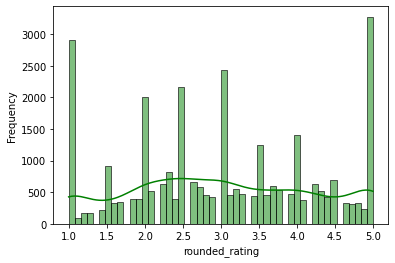

In [ ]:
sns.histplot(data = df, x='rounded_rating', kde=True, bins=50, stat='frequency', color = 'green')

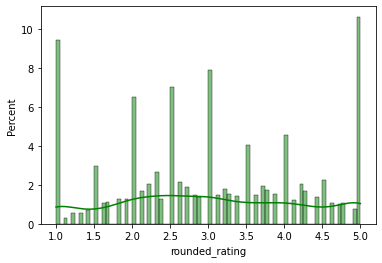

In [ ]:
sns.histplot(data = df, x='rounded_rating', kde=True, bins = 80, stat='percent', color = 'green')

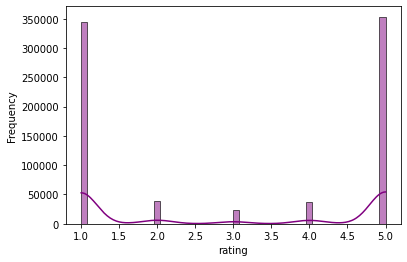

In [ ]:
sns.histplot(data = second_df, x='rating', kde=True, bins=50, stat='frequency', color = 'purple')

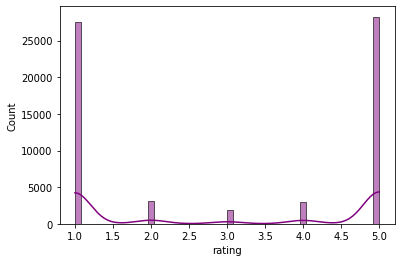

In [ ]:
sns.histplot(data = second_df, x='rating', kde=True, bins=50, stat='count', color = 'purple')

# Task 4: Sentiment analysis 

### Apply sentiment analysis

In [ ]:
df_SA=df[['Business ID ','rounded_rating','doctorID','Name','Business Category','review_content','review_lemma_string_final']]
df_SA.rename({'Business ID ':'Business ID'}, axis=1,inplace=True)
df_SA.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final
0,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",Best guy to check what's going on up there!!! ...,best guy check many many year always recommend...
1,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",This review does not reflect what I think of t...,review reflect think business however reflect ...
2,chuang-t-hung-md-upland,2.7,101,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",I have been having issues with my liver/stomac...,issue liver stomach couple year real solution ...


In [ ]:
!pip install textblob
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_SA['polarity'] = df_SA['review_lemma_string_final'].apply(lambda row: TextBlob (row).sentiment[0])
df_SA['subjectivity'] = df_SA['review_lemma_string_final'].apply(lambda row: TextBlob (row).sentiment[1])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yuri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_SA['NLTK_Compound'] = df_SA['review_lemma_string_final'].apply(lambda row: sia.polarity_scores(row)['compound'])

In [ ]:
df_SA_agg = df_SA.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'], 
                          as_index=False)['polarity','subjectivity','NLTK_Compound'].apply (lambda x: np.mean(x, axis=0))
df_SA_agg.head(5)

C:\Users\Yuri\AppData\Local\Temp\ipykernel_25848\3898291831.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_SA_agg = df_SA.groupby(['Business ID','rounded_rating','doctorID','Name','Business Category'],


,Business ID,rounded_rating,doctorID,Name,Business Category,polarity,subjectivity,NLTK_Compound
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",0.405979,0.642869,0.962729
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",0.391728,0.585269,0.799167
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",0.330723,0.580852,0.664585
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",-0.300000,0.600000,-0.440400
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",0.225908,0.596353,0.538986


In [ ]:
df_SA_agg.to_csv('reviews_SA.csv',encoding = 'utf-8-sig')

### Explore the corelations

In [ ]:
import scipy.stats as stats
x=df_SA_agg.iloc[:,1].tolist()
y1= df_SA_agg.iloc[:,5].tolist() 
y2= df_SA_agg.iloc[:,6].tolist()
y3=df_SA_agg.iloc[:,7].tolist()

stats.pearsonr(a, y1)

(0.7688682837087171, 0.0)

In [ ]:
stats.pearsonr(a, y2)

(0.23773507608418354, 4.715068589530366e-33)

In [ ]:
stats.pearsonr(a, y3)

(0.7669583760678683, 0.0)

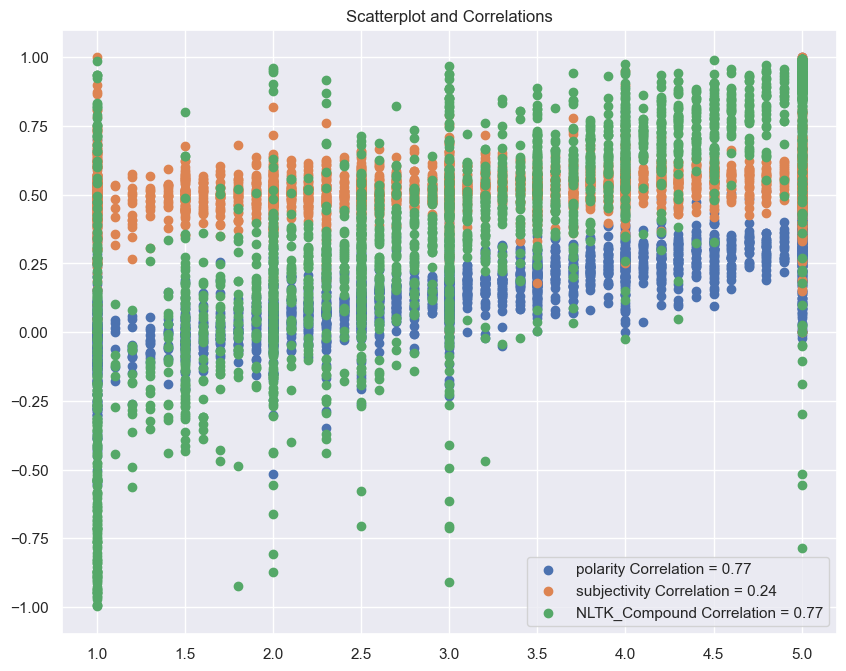

In [ ]:
# Scatterplot and Correlations

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'polarity Correlation = {np.round(np.corrcoef(x,y1)[0,1], 2)}')
plt.scatter(x, y2, label=f'subjectivity Correlation = {np.round(np.corrcoef(x,y2)[0,1], 2)}')
plt.scatter(x, y3, label=f'NLTK_Compound Correlation = {np.round(np.corrcoef(x,y3)[0,1], 2)}')
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

# Task 5: Topic modeling

In [ ]:
!pip install --update gensim # you may need to update gensim 
!pip install -q pyLDAvis # for visualization
from gensim.models.phrases import Phrases, Phraser
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel, LsiModel
from gensim.corpora import MmCorpus
from gensim.models import CoherenceModel # for evaluation
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
# sent = [text.split() for text in review_data['review_final']] #A stream of sentences (a list of list of words) from the original text
sent = df_agg['review_lemma_tokens_final'].tolist()
bigram = Phrases(sent, min_count=25) # bigram model with min_count as 25. 

bigram_phraser = Phraser(bigram) # export the trained bigram model

# apply the exported model to each review of the corpus
texts = bigram_phraser[sent]

# created a list of bigram phrases
bigrams = []
for text in texts:
  for word in text: 
    if '_' in word:
      bigrams.append(word)
bigrams [:5]

['physical_therapy',
 'friend_mine',
 'physical_therapist',
 'send_home',
 'highly_recommend']

In [ ]:
# build id2word dictionary, assign integer id to each unique token, including unigram and bigrams
id2word = Dictionary(texts)

# heck what is in the dictionary 
for key, value in sorted(id2word.items())[:5]:
  print(key, value)  

0 able
1 accommodate
2 allow
3 already
4 also


In [ ]:
# Remove very rare and very frequent

In [ ]:
# remove very rare (less than 60 documents, about 1% of the corpus) 
# and very frequent (more than 50% of the documents).
id2word.filter_extremes(no_below=60, no_above=0.5) 
print('final number of terms (size of id2word)', len(id2word))

final number of terms (size of id2word) 2957


**Create corpus in BOW format**

In [ ]:
# create a corpus, which here is the BOW bigram model 
corpus = [id2word.doc2bow(doc) for doc in texts]

# corpus as list of list with tuples of (token_id, frequency) example
print(*corpus[0])

(0, 1) (1, 1) (2, 1) (3, 1) (4, 1) (5, 1) (6, 1) (7, 2) (8, 1) (9, 1) (10, 1) (11, 1) (12, 1) (13, 2) (14, 1) (15, 2) (16, 1) (17, 1) (18, 1) (19, 1) (20, 2) (21, 1) (22, 2) (23, 1) (24, 1) (25, 1) (26, 1) (27, 1) (28, 1) (29, 1) (30, 2) (31, 2) (32, 2) (33, 1) (34, 1) (35, 2) (36, 1) (37, 1) (38, 1) (39, 1) (40, 1) (41, 1) (42, 1) (43, 1) (44, 1) (45, 4) (46, 1) (47, 3) (48, 1) (49, 1) (50, 1) (51, 1) (52, 1) (53, 11) (54, 1) (55, 1) (56, 1) (57, 1) (58, 1) (59, 1) (60, 2) (61, 7) (62, 1) (63, 2) (64, 1) (65, 1) (66, 1) (67, 1) (68, 1) (69, 1) (70, 1) (71, 1) (72, 1) (73, 1) (74, 1) (75, 1) (76, 2) (77, 1) (78, 1) (79, 1) (80, 1) (81, 1) (82, 1) (83, 1) (84, 2) (85, 1) (86, 1) (87, 1) (88, 1) (89, 1) (90, 1) (91, 1) (92, 2) (93, 1) (94, 1) (95, 1) (96, 1) (97, 1) (98, 1) (99, 1) (100, 1) (101, 1) (102, 1) (103, 2) (104, 2) (105, 3) (106, 1) (107, 1) (108, 1) (109, 2) (110, 1) (111, 1) (112, 1)


### **LDA topic models with different hyperparameters**

**First run coherence score computation to find the topic number for best model.**

In [ ]:
def compute_lda_coherence_scores (id2word, texts, corpus, stop, start, step):
  coherence_score = []
  model_list = []

  for n_topics in range (start, stop, step):
    chunksize = 1500
    passes = 20
    iterations = 400 # we increase its iterations
    eval_every = None  # 
    
    lda_model = LdaModel(corpus=corpus,
                                id2word=id2word,
                                num_topics=n_topics, 
                                random_state=100,
                                chunksize=chunksize,
                                passes=passes,
                                alpha='auto',
                                eta ='auto',
                                iterations = iterations,
                                gamma_threshold=0.001,
                                per_word_topics=True,
                                eval_every = eval_every)
    
    model_list.append(lda_model)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score.append(coherence_model_lda.get_coherence())
  return model_list, coherence_score

In [ ]:
lda_models = compute_lda_coherence_scores (id2word, texts, corpus, 20, 4, 2)

In [ ]:
i=0
for n_topics in range(4, 20,2):
    print(f'Topic Number : {n_topics},  Coherence Score : {lda_models[1][i]}')
    i+=1

Topic Number : 4,  Coherence Score : 0.385590832892726
Topic Number : 6,  Coherence Score : 0.3925839274794007
Topic Number : 8,  Coherence Score : 0.40739752692862446
Topic Number : 10,  Coherence Score : 0.37995726488869436
Topic Number : 12,  Coherence Score : 0.38733610411161007
Topic Number : 14,  Coherence Score : 0.37675632339345394
Topic Number : 16,  Coherence Score : 0.3866054921037544
Topic Number : 18,  Coherence Score : 0.3926201443077239


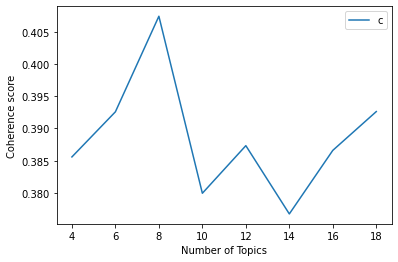

In [ ]:
x = range(4, 20, 2)
plt.plot(x, lda_models[1])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**LDA model with 8 number of topics has highest coherence score**

### Experiment-1 with hyperparameters as follows

In [ ]:
num_topics = 8 #Topic number selected based on coherence score
chunksize = 1500 # depending on the corpus size, the chunksize should be adjusted
passes = 20
iterations = 400 # this is related to chunk size. If chunk size is small, this needs to be increased to ensure converge.

# train LDA model 
import time 
start = time.time()

lda_model1 = LdaModel(corpus=corpus, # this is bigram BOW model                                             
                    id2word=id2word, # this is the dictionary 
                    num_topics=num_topics, 
                    random_state=100, # keep a random state so result can be repeated
                    chunksize=chunksize,
                    passes=passes,
                    alpha='auto',
                    eta ='auto',
                    iterations = iterations,
                    gamma_threshold=0.001,
                    per_word_topics=True,
                    eval_every = None,
                    )

print('training time in minute', (time.time() - start)/60)

training time in minute 2.784407881895701


### Experiment-2 with hyperparameters as follows

In [ ]:
num_topics = 8 #Topic number selected based on coherence score
chunksize = 2000 # depending on the corpus size, the chunksize should be adjusted
passes = 20
iterations = 400 # this is related to chunk size. If chunk size is small, this needs to be increased to ensure converge.

# train LDA model 
import time 
start = time.time()

lda_model2 = LdaModel(corpus=corpus, # this is bigram BOW model                                             
                    id2word=id2word, # this is the dictionary 
                    num_topics=num_topics, 
                    random_state=100, # keep a random state so result can be repeated
                    chunksize=chunksize,
                    passes=passes,
                    alpha='auto',
                    eta ='auto',
                    iterations = iterations,
                    gamma_threshold=0.001,
                    per_word_topics=True,
                    eval_every = None,
                    )

print('training time in minute', (time.time() - start)/60)

training time in minute 2.6320624152819314


### Experiment-3 with hyperparameters as follows

In [ ]:
num_topics = 8 #Topic number selected based on coherence score
chunksize = 1000 # depending on the corpus size, the chunksize should be adjusted
passes = 20
iterations = 400 # this is related to chunk size. If chunk size is small, this needs to be increased to ensure converge.

# train LDA model 
import time 
start = time.time()

lda_model3 = LdaModel(corpus=corpus, # this is bigram BOW model                                             
                    id2word=id2word, # this is the dictionary 
                    num_topics=num_topics, 
                    random_state=100, # keep a random state so result can be repeated
                    chunksize=chunksize,
                    passes=passes,
                    alpha='auto',
                    eta ='auto',
                    iterations = iterations,
                    gamma_threshold=0.001,
                    per_word_topics=True,
                    eval_every = None,
                    )

print('training time in minute', (time.time() - start)/60)

training time in minute 3.239431381225586


### **Evaluation**

**Top words in each topic for exp-1**

In [ ]:
for index, value in lda_model1.print_topics(num_topics=8, num_words=10):
    print('Topic ', index, ':', value)

Topic  0 : 0.028*"son" + 0.025*"child" + 0.022*"daughter" + 0.020*"kid" + 0.013*"love" + 0.013*"pediatrician" + 0.011*"baby" + 0.007*"nurse" + 0.006*"sick" + 0.006*"little"
Topic  1 : 0.007*"pay" + 0.006*"send" + 0.005*"receptionist" + 0.005*"speak" + 0.005*"receive" + 0.005*"referral" + 0.005*"finally" + 0.004*"horrible" + 0.004*"front" + 0.004*"follow"
Topic  2 : 0.024*"urgent_care" + 0.008*"nurse" + 0.007*"test" + 0.007*"clinic" + 0.007*"facility" + 0.006*"front_desk" + 0.005*"clean" + 0.005*"today" + 0.005*"location" + 0.005*"pain"
Topic  3 : 0.010*"family" + 0.009*"health" + 0.009*"listen" + 0.007*"highly_recommend" + 0.007*"physician" + 0.007*"love" + 0.006*"concern" + 0.006*"medication" + 0.006*"husband" + 0.006*"practice"
Topic  4 : 0.022*"surgery" + 0.017*"procedure" + 0.011*"eye" + 0.009*"result" + 0.008*"treatment" + 0.008*"amazing" + 0.008*"make_feel" + 0.007*"skin" + 0.007*"highly_recommend" + 0.007*"love"
Topic  5 : 0.033*"hospital" + 0.031*"nurse" + 0.009*"pain" + 0.008*

**Top words in each topic for exp-2**

In [ ]:
for index, value in lda_model2.print_topics(num_topics=8, num_words=10):
    print('Topic ', index, ':', value)

Topic  0 : 0.024*"son" + 0.023*"child" + 0.019*"daughter" + 0.016*"kid" + 0.014*"baby" + 0.011*"love" + 0.010*"pediatrician" + 0.006*"little" + 0.006*"nurse" + 0.006*"sick"
Topic  1 : 0.007*"pay" + 0.006*"receptionist" + 0.005*"send" + 0.005*"front" + 0.005*"receive" + 0.005*"finally" + 0.005*"bill" + 0.005*"speak" + 0.005*"follow" + 0.005*"surgery"
Topic  2 : 0.022*"urgent_care" + 0.008*"test" + 0.007*"clinic" + 0.007*"nurse" + 0.006*"front_desk" + 0.006*"facility" + 0.005*"pay" + 0.005*"pain" + 0.005*"today" + 0.005*"send"
Topic  3 : 0.009*"family" + 0.009*"listen" + 0.008*"health" + 0.008*"medication" + 0.007*"physician" + 0.006*"highly_recommend" + 0.006*"love" + 0.005*"husband" + 0.005*"practice" + 0.005*"thorough"
Topic  4 : 0.020*"surgery" + 0.017*"procedure" + 0.010*"eye" + 0.009*"result" + 0.008*"amazing" + 0.008*"treatment" + 0.007*"make_feel" + 0.007*"love" + 0.007*"skin" + 0.007*"highly_recommend"
Topic  5 : 0.034*"hospital" + 0.031*"nurse" + 0.009*"pain" + 0.009*"kaiser" +

**Top words in each topic for exp-3**

In [ ]:
for index, value in lda_model3.print_topics(num_topics=8, num_words=10):
    print('Topic ', index, ':', value)

Topic  0 : 0.018*"son" + 0.015*"child" + 0.014*"daughter" + 0.012*"love" + 0.012*"kid" + 0.008*"family" + 0.008*"highly_recommend" + 0.008*"pediatrician" + 0.007*"baby" + 0.006*"helpful"
Topic  1 : 0.015*"surgery" + 0.011*"eye" + 0.009*"pay" + 0.008*"procedure" + 0.006*"bill" + 0.005*"receive" + 0.005*"follow" + 0.005*"glass" + 0.004*"receptionist" + 0.004*"send"
Topic  2 : 0.019*"urgent_care" + 0.007*"test" + 0.006*"clinic" + 0.006*"nurse" + 0.006*"front_desk" + 0.005*"facility" + 0.005*"pay" + 0.005*"today" + 0.005*"send" + 0.005*"receptionist"
Topic  3 : 0.004*"nurse" + 0.003*"job" + 0.003*"receive" + 0.003*"listen" + 0.003*"pay" + 0.003*"treatment" + 0.003*"pain" + 0.003*"highly_recommend" + 0.003*"start" + 0.003*"family"
Topic  4 : 0.019*"surgery" + 0.017*"procedure" + 0.010*"result" + 0.009*"treatment" + 0.009*"amazing" + 0.008*"skin" + 0.008*"make_feel" + 0.008*"love" + 0.007*"highly_recommend" + 0.007*"comfortable"
Topic  5 : 0.029*"hospital" + 0.029*"nurse" + 0.009*"kaiser" + 

We can observe that the 1st experiment with chunksize = 1500 gives better topic modeling with more relevant  top words in each topic. For example: Topic 7 is talking about a pregnant woman give bith a healthy baby. Each experiments talks about the same information but little less relevant  words are modeled as top words.

**Coherence score for Exp-1**

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model1, texts=texts, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score for the 1st experiment = {coherence_score}')

Coherence Score for the 1st experiment = 0.40739752692862446


**Top words in each topic for exp-2**

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model2, texts=texts, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score for the 2st experiment = {coherence_score}')

Coherence Score for the 2st experiment = 0.3967243318191322


**Top words in each topic for exp-3**

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model3, texts=texts, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score for the 3st experiment = {coherence_score}')

Coherence Score for the 3st experiment = 0.37164190491156823


**Based on the coherence score model in experiment 1st model is the best model**

### Visualization on the best topic model

In [ ]:
# visualize the result using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.055054 -0.030840       1        1  19.515487
5      0.059518  0.058627       2        1  18.725867
2      0.053317 -0.010118       3        1  18.547376
4     -0.097996 -0.007704       4        1  12.162569
3     -0.026087 -0.052059       5        1  10.572876
7      0.049462  0.061722       6        1   7.801437
0      0.010188 -0.074343       7        1   6.996854
6     -0.103456  0.054716       8        1   5.677535, topic_info=             Term          Freq         Total Category  logprob  loglift
1071     hospital  12126.000000  12126.000000  Default  30.0000  30.0000
869   urgent_care   7248.000000   7248.000000  Default  29.0000  29.0000
526          pain   8992.000000   8992.000000  Default  28.0000  28.0000
838           son   6040.000000   6040.000000  Default  27.0000  27.0000
578       surgery   8474.000000   8474.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
68           love    391.126696   5868.684731   Topic8  -5.4790   0.1603
120       awesome    331.322094   2752.122456   Topic8  -5.6449   0.7516
47         health    346.317495   4608.085263   Topic8  -5.6007   0.2804
193           lot    323.457656   3521.301202   Topic8  -5.6690   0.4811
1059         hand    302.587202   3308.280927   Topic8  -5.7357   0.4768

[549 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2009      2  0.841581  abdominal_pain
2009      3  0.107895  abdominal_pain
2009      6  0.035965  abdominal_pain
2009      8  0.007193  abdominal_pain
2948      1  0.154115      accessible
...     ...       ...             ...
887       4  0.079914        year_old
887       5  0.043497        year_old
887       6  0.039451        year_old
887       7  0.191692        year_old
887       8  0.068281        year_old

[2776 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 3, 5, 4, 8, 1, 7])

## Label to each topic by best topic model based on evaluation.

**Top words in each topic for exp-1**

In [ ]:
for index, value in lda_model1.print_topics(num_topics=8, num_words=10):
    print('Topic ', index, ':', value)

Topic  0 : 0.028*"son" + 0.025*"child" + 0.022*"daughter" + 0.020*"kid" + 0.013*"love" + 0.013*"pediatrician" + 0.011*"baby" + 0.007*"nurse" + 0.006*"sick" + 0.006*"little"
Topic  1 : 0.007*"pay" + 0.006*"send" + 0.005*"receptionist" + 0.005*"speak" + 0.005*"receive" + 0.005*"referral" + 0.005*"finally" + 0.004*"horrible" + 0.004*"front" + 0.004*"follow"
Topic  2 : 0.024*"urgent_care" + 0.008*"nurse" + 0.007*"test" + 0.007*"clinic" + 0.007*"facility" + 0.006*"front_desk" + 0.005*"clean" + 0.005*"today" + 0.005*"location" + 0.005*"pain"
Topic  3 : 0.010*"family" + 0.009*"health" + 0.009*"listen" + 0.007*"highly_recommend" + 0.007*"physician" + 0.007*"love" + 0.006*"concern" + 0.006*"medication" + 0.006*"husband" + 0.006*"practice"
Topic  4 : 0.022*"surgery" + 0.017*"procedure" + 0.011*"eye" + 0.009*"result" + 0.008*"treatment" + 0.008*"amazing" + 0.008*"make_feel" + 0.007*"skin" + 0.007*"highly_recommend" + 0.007*"love"
Topic  5 : 0.033*"hospital" + 0.031*"nurse" + 0.009*"pain" + 0.008*

Topic 0 : This topic talks child care and pediatrician. So, topic label: "pediatrician"

Topic 1 : This topic talks about receptionist, payment and referral. Therefore, topic label should be "receptionist"

Topic 2 : This topic talks about clinic facilities for urgent care with all cleaness. Therefore, topic label: "clinic facilities"

Topic 3 : This topic talks about family health, medication and love recomendation by physician. Topic label: "family health"

Topic 4 : This topic talks about eye surgery procedures and skin treatment post-surgery. Therefore, topic label: "eye-surgery"

Topic 5 : This topic talks about hospital and nurse. Therefore, topic label: "Nurse"

Topic 6 : This topic talks about physio therapy, surgery and pain. Therefore, topic lable should be "Physiotherapy"

Topic 7 : This topic talks about healthy baby birth by a pregnant woman and related procedures like ultrasound. Therefore, topic label: "Baby Delivery"

# Task 6: Supervised learning

## Create textual features:

### Frequency-based BOW

In [ ]:
df_BOW=df_agg.copy()
df_BOW.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ..."
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla..."
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work..."


In [ ]:
from nltk import FreqDist

def frequency_feature(row, col_name, word):
  if word in row[col_name]:
    return row[col_name].count(word)
  else:
    return 0

In [ ]:
fdist_reviews= FreqDist([token for sublist in df_BOW['review_lemma_tokens_final'].values for token in sublist])
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse= True)

In [ ]:
# create a list of top 300 lemmas
token_list300 = [token[0] for token in fdist_reviews_list[:300]]
print(len(token_list300)) # check the number of the top 300 stems list
print(token_list300)

300
['get', 'doctor', 'time', 'care', 'would', 'staff', 'see', 'call', 'office', 'wait', 'take', 'say', 'tell', 'make', 'patient', 'appointment', 'come', 'back', 'one', 'need', 'give', 'like', 'place', 'could', 'even', 'nurse', 'hour', 'know', 'day', 'ask', 'never', 'great', 'good', 'work', 'room', 'year', 'well', 'experience', 'recommend', 'feel', 'first', 'help', 'want', 'hospital', 'people', 'pain', 'medical', 'really', 'bad', 'visit', 'also', 'leave', 'find', 'always', 'look', 'minute', 'service', 'insurance', 'week', 'another', 'surgery', 'front', 'check', 'ever', 'try', 'rude', 'nice', 'urgent', 'friendly', 'review', 'question', 'still', 'best', 'right', 'month', 'long', 'cannot', 'think', 'way', 'thank', 'much', 'professional', 'treat', 'thing', 'answer', 'phone', 'new', 'test', 'pay', 'since', 'two', 'result', 'every', 'walk', 'star', 'issue', 'son', 'sure', 'family', 'love', 'kind', 'send', 'treatment', 'talk', 'last', 'schedule', 'explain', 'keep', 'daughter', 'receive', 'eve

In [ ]:
for word in token_list300:
  df_BOW[word] = df_BOW.apply(lambda row:frequency_feature(row, 'review_lemma_tokens_final', word), axis=1) 

In [ ]:
df_BOW.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final,get,doctor,...,fast,attitude,continue,late,especially,wish,face,company,terrible,hard
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ...",1,0,...,1,0,0,0,0,0,0,0,0,0
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla...",5,0,...,0,0,0,0,0,0,0,0,0,1
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work...",10,2,...,1,1,0,0,2,0,0,0,0,0


In [ ]:
df_BOW.to_csv('reviews_BOW.csv',encoding = 'utf-8-sig')

### TF-IDF

In [ ]:
df_tfidf_raw=df_agg.copy()
df_tfidf_raw.head(3)
df_tfidf_raw = df_tfidf_raw.reset_index().rename(columns={'index': 'indexID'})
df_tfidf_raw.head(5)

,indexID,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final
0,0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ..."
1,1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla..."
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work..."
3,3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",I am shocked at the way I was handled over the...,shock way handle phone office rude disrespectf...,"[shock, way, handle, phone, office, rude, disr..."
4,4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",Growing up on the beach in Santa Monica was a ...,growing beach dream time skin show effect sun ...,"[growing, beach, dream, time, skin, show, effe..."


In [ ]:
# create a dictionary of tokens
import gensim
dictionary = gensim.corpora.Dictionary(df_tfidf_raw['review_lemma_tokens_final'])

In [ ]:
np.shape(df_tfidf_raw)

(2468, 9)

In [ ]:
# create the reduced token list 
# with a minimal TF - document frequency count, 2468/10=246
# with a max TF -ocument frequency count, 2468/3=822
token_list =[]
for token_id, count in dictionary.dfs.items(): 
      if count in range(246,1234):
        token_list.append(dictionary.get(token_id)) 

print(len(token_list)) # check the token list length
print(token_list[:10]) # see the list of tokens 

904
['home', 'locate', 'center', 'dad', 'felt', 'longer', 'drive', 'become', 'difficult', 'physical']


In [ ]:
# create a corpus (a list of list of lemmas) of all cleaned lemma
messages = df_tfidf_raw['review_lemma_tokens_final'].tolist()

# only include tokens that appear in more than 1% of users
reduced_token_list=[]
for item in messages:
  reduced_token = [word for word in item if word in token_list]
  reduced_token_list.append(reduced_token)
    
# map the list in the token list to string for further vectirization
reduced_token_list_strings=[]
for list in reduced_token_list:
  strings=' '.join(map(str,list))
  reduced_token_list_strings.append(strings)

from sklearn.feature_extraction.text import TfidfVectorizer

# use default setting that include all tokens above
tfidf = TfidfVectorizer(max_features=None)

# use Sklearn to find the TF-IDF vectors
tfidf_sklearn = tfidf.fit_transform(reduced_token_list_strings)

# create a dataframe for the TF-IDF vectors
tfidf_vectors = pd.DataFrame(tfidf_sklearn.toarray(), columns=tfidf.get_feature_names_out())
tfidf_vectors = tfidf_vectors.reset_index().rename(columns={'index': 'indexID'})
tfidf_vectors.head(3)

,indexID,ability,absolute,absolutely,accept,accident,accommodate,across,act,action,...,write,wrong,yeah,yell,yelp,yes,yesterday,yet,young,zero
0,0,0.000000,0.0,0.0,0.0,0.0,0.074299,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,1,0.078751,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.047495,0.0,0.0
2,2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.048557,0.0,0.000000,0.0,0.0


In [ ]:
df_tfidf = pd.merge(left=df_tfidf_raw, right=tfidf_vectors, left_on='indexID', right_on='indexID')
df_tfidf = df_tfidf.drop('indexID',axis=1)
df_tfidf.head(5)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final,ability,absolute,...,write,wrong,yeah,yell,yelp,yes,yesterday,yet,young,zero
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ...",0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla...",0.078751,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.047495,0.0,0.0
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work...",0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.048557,0.0,0.000000,0.0,0.0
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",I am shocked at the way I was handled over the...,shock way handle phone office rude disrespectf...,"[shock, way, handle, phone, office, rude, disr...",0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",Growing up on the beach in Santa Monica was a ...,growing beach dream time skin show effect sun ...,"[growing, beach, dream, time, skin, show, effe...",0.000000,0.0,...,0.027855,0.0,0.0,0.0,0.03454,0.000000,0.0,0.028218,0.0,0.0


In [ ]:
df_tfidf.to_csv('reviews_tfidf.csv',encoding = 'utf-8-sig')

### NER tags and sentiment analysis features

In [ ]:
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm') 

def ne_spacy_tagger(row, col_name, ner_cat):
  tag_list = []
  text = row[col_name]
  doc = nlp(text)
  for ent in doc.ents:
    entity = ent.text
    en_category = ent.label_
    t = (en_category, entity)
    if en_category == ner_cat:
      tag_list.append(t)
  return len(set(tag_list))

In [ ]:
df_NER=df_agg.copy()

df_NER['NER_ORG'] = df_agg.apply(lambda row:ne_spacy_tagger(row, 'review_lemma_string_final', 'ORG'), axis =1)

df_NER['NER_DATE'] = df_agg.apply(lambda row:ne_spacy_tagger(row, 'review_lemma_string_final', 'DATE'), axis =1)

df_NER['NER_PERSON'] = df_agg.apply(lambda row:ne_spacy_tagger(row, 'review_lemma_string_final', 'PERSON'), axis =1)

df_NER['NER_MONEY']=df_agg.apply(lambda row:ne_spacy_tagger(row, 'review_lemma_string_final', 'MONEY'), axis =1)

In [ ]:
df_NER.head(5)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final,NER_ORG,NER_DATE,NER_PERSON,NER_MONEY
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ...",0,3,0,0
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla...",2,5,0,0
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work...",0,6,0,0
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",I am shocked at the way I was handled over the...,shock way handle phone office rude disrespectf...,"[shock, way, handle, phone, office, rude, disr...",0,0,0,0
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",Growing up on the beach in Santa Monica was a ...,growing beach dream time skin show effect sun ...,"[growing, beach, dream, time, skin, show, effe...",1,3,0,0


In [ ]:
np.shape(df_NER)

(2468, 12)

In [ ]:
np.shape(df_NER.loc[:, (df_NER != 0).any(axis=0)])

(2468, 12)

In [ ]:
df_NER.to_csv('review_NER.csv', encoding = 'utf-8-sig') 

In [ ]:
df_combined=pd.concat([df_NER, df_SA_agg.iloc[:,5:]], axis=1)
df_combined=df_combined[['Business ID','rounded_rating','doctorID','Name','Business Category'
                         ,'NER_ORG','NER_DATE','NER_PERSON','NER_MONEY','polarity','subjectivity','NLTK_Compound']]
df_combined.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,NER_ORG,NER_DATE,NER_PERSON,NER_MONEY,polarity,subjectivity,NLTK_Compound
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",0,3,0,0,0.405979,0.642869,0.962729
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",2,5,0,0,0.391728,0.585269,0.799167
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",0,6,0,0,0.330723,0.580852,0.664585


In [ ]:
# Normalize the NER tags
from sklearn.preprocessing import StandardScaler
X_ner = df_combined[['NER_ORG',	'NER_DATE',	'NER_PERSON','NER_MONEY']]
scaler = StandardScaler()

# transform data
X_ner_scaled = scaler.fit_transform(X_ner)
X_ner_scaled
df_combined['NER_ORG_Scaled'] = X_ner_scaled.T[0]
df_combined['NER_DATE_Scaled'] = X_ner_scaled.T[1]
df_combined['NER_PERSON_Scaled'] = X_ner_scaled.T[2]
df_combined['NER_MONEY_Scaled'] = X_ner_scaled.T[3]
df_combined.head(5)

,Business ID,rounded_rating,doctorID,Name,Business Category,NER_ORG,NER_DATE,NER_PERSON,NER_MONEY,polarity,subjectivity,NLTK_Compound,NER_ORG_Scaled,NER_DATE_Scaled,NER_PERSON_Scaled,NER_MONEY_Scaled
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",0,3,0,0,0.405979,0.642869,0.962729,-0.429661,-0.497454,-0.381592,-0.257784
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",2,5,0,0,0.391728,0.585269,0.799167,0.204741,-0.356814,-0.381592,-0.257784
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",0,6,0,0,0.330723,0.580852,0.664585,-0.429661,-0.286494,-0.381592,-0.257784
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",0,0,0,0,-0.300000,0.600000,-0.440400,-0.429661,-0.708414,-0.381592,-0.257784
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",1,3,0,0,0.225908,0.596353,0.538986,-0.112460,-0.497454,-0.381592,-0.257784


In [ ]:
df_combined.to_csv('reviews_NER_SA.csv', encoding = 'utf-8-sig')

### Gloves Pre-train twitter.27B.200d

In [ ]:
# define the path to read the pre-trained vectors
pretrainedpath = '/Users/Yuri/glove.twitter.27B.200d.txt.gz'

In [ ]:
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format(pretrainedpath) 

# create a function that calculates the average of average of vectors over each status update for a user
def document_vector(word2vec_model, doc):
    return np.mean(word2vec_model[doc], axis =0)



In [ ]:
df_glove_raw=df_agg[['Business ID','rounded_rating','doctorID','Name','Business Category','review_lemma_tokens_final']].copy() 

df_glove_raw = df_glove_raw.reset_index().rename(columns={'index': 'indexID'}) # create a unique ID for merging

In [ ]:
# only include any words from the Glove vocabulary
mtext = df_glove_raw['review_lemma_tokens_final'].tolist()
mtext_clean = [[word for word in message if word in glove_model.index_to_key] for message in mtext]

In [ ]:
# check if any status update that does not include any words from the Glove vocabulary.
empty = []  
for i, lst in enumerate(mtext_clean):  
    if lst ==[]: empty.append(i)  
print(empty)

[]


In [ ]:
msg_vectors = []
for i in range(len(mtext_clean)):
    if i not in empty:
        msg_vectors.append(document_vector(glove_model,mtext_clean[i]))
    else: msg_vectors.append( np.zeros(200,) ) # since the model is 200d

In [ ]:
msg_vectors_a = np.array(msg_vectors) # convert into array

In [ ]:
# convert embedding vectors to the draft dataframe
labels = ['AWE' + str(i) for i in range (1, 201)]
awe_df = pd.DataFrame(msg_vectors_a, index=df_glove_raw['indexID'].tolist(), columns=labels)
awe_df = awe_df.reset_index()
awe_df.rename(columns={'index':'indexID'}, inplace=True)
awe_df.head(5)

,indexID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,...,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
0,0,0.026059,0.124322,-0.059792,-0.018517,0.020472,0.085809,0.678513,-0.011019,-0.026834,...,-0.108237,0.061750,0.132979,-0.137457,0.030931,0.014481,0.167789,0.053482,-0.005715,-0.064971
1,1,-0.071928,0.044708,-0.019660,-0.026914,0.008438,0.089707,0.600606,-0.064142,-0.039016,...,-0.025482,0.034839,0.077921,-0.064481,0.108581,-0.052554,0.086158,0.074525,0.041948,-0.050511
2,2,0.035490,0.052178,-0.027157,-0.042163,0.029677,0.118611,0.701179,-0.008998,-0.045940,...,-0.072663,0.017579,0.089819,-0.096522,0.074411,-0.085270,0.067982,0.070167,0.056712,0.003231
3,3,-0.037787,0.174142,-0.174670,0.106792,0.116708,0.038169,0.652175,-0.071135,0.142023,...,-0.110416,0.042387,0.046308,-0.206192,0.143104,-0.028753,0.008181,0.074468,0.016034,-0.062256
4,4,-0.016078,0.031949,-0.031174,0.022802,0.016231,0.078538,0.623929,-0.048225,-0.020598,...,-0.003541,-0.004253,0.073177,-0.066532,0.089075,-0.040279,0.093503,0.096655,0.039184,-0.072475


In [ ]:
# merge the datasets using indexID 
df_glove = pd.merge(left=df_glove_raw, right=awe_df, left_on='indexID', right_on='indexID')
df_glove = df_glove.drop(['indexID'],axis=1)
df_glove.head()                   

,Business ID,rounded_rating,doctorID,Name,Business Category,review_lemma_tokens_final,AWE1,AWE2,AWE3,AWE4,...,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","[great, home, health, service, locate, right, ...",0.026059,0.124322,-0.059792,-0.018517,...,-0.108237,0.061750,0.132979,-0.137457,0.030931,0.014481,0.167789,0.053482,-0.005715,-0.064971
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","[ever, green, collective, blvd, riverside, pla...",-0.071928,0.044708,-0.019660,-0.026914,...,-0.025482,0.034839,0.077921,-0.064481,0.108581,-0.052554,0.086158,0.074525,0.041948,-0.050511
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,","[doctor, staff, great, recommend, friend, work...",0.035490,0.052178,-0.027157,-0.042163,...,-0.072663,0.017579,0.089819,-0.096522,0.074411,-0.085270,0.067982,0.070167,0.056712,0.003231
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,","[shock, way, handle, phone, office, rude, disr...",-0.037787,0.174142,-0.174670,0.106792,...,-0.110416,0.042387,0.046308,-0.206192,0.143104,-0.028753,0.008181,0.074468,0.016034,-0.062256
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...","[growing, beach, dream, time, skin, show, effe...",-0.016078,0.031949,-0.031174,0.022802,...,-0.003541,-0.004253,0.073177,-0.066532,0.089075,-0.040279,0.093503,0.096655,0.039184,-0.072475


In [ ]:
np.shape(df_glove)

(2468, 206)

In [ ]:
df_glove.to_csv('reviews_glove.csv', encoding = 'utf-8-sig')

### Topic Vectors based on best topic model


In [ ]:
sent = df_raw['review_lemma_tokens_final'].tolist()
bigram = Phrases(sent, min_count=25) # bigram model with min_count as 25. 
bigram_phraser = Phraser(bigram) # export the trained bigram model
# apply the exported model to each review of the corpus
texts = bigram_phraser[sent]
id2word = Dictionary(texts)
id2word.filter_extremes(no_below=60, no_above=0.5) 
# create a corpus, which here is the BOW bigram model 
corpus = [id2word.doc2bow(doc) for doc in texts]

In [ ]:
num_topics = 8 
chunksize = 1500
passes = 20
iterations = 400 
lda_model1 = LdaModel(corpus=corpus, # this is bigram BOW model                                             
                    id2word=id2word, # this is the dictionary 
                    num_topics=num_topics, 
                    random_state=100, # keep a random state so result can be repeated
                    chunksize=chunksize,
                    passes=passes,
                    alpha='auto',
                    eta ='auto',
                    iterations = iterations,
                    gamma_threshold=0.001,
                    per_word_topics=True,
                    eval_every = None,
                    )


In [ ]:
lda_model1.print_topics(8, num_words=20)

[(0,
  '0.032*"son" + 0.029*"child" + 0.025*"daughter" + 0.022*"kid" + 0.014*"love" + 0.014*"pediatrician" + 0.013*"baby" + 0.007*"sick" + 0.007*"nurse" + 0.007*"little" + 0.007*"old" + 0.006*"parent" + 0.006*"bring" + 0.006*"amazing" + 0.005*"shot" + 0.005*"question" + 0.005*"concern" + 0.005*"happy" + 0.005*"year_old" + 0.004*"front"'),
 (1,
  '0.007*"pay" + 0.006*"send" + 0.005*"speak" + 0.005*"receptionist" + 0.005*"receive" + 0.005*"referral" + 0.005*"finally" + 0.004*"horrible" + 0.004*"follow" + 0.004*"front" + 0.004*"unprofessional" + 0.004*"bill" + 0.004*"return" + 0.004*"result" + 0.004*"today" + 0.004*"show" + 0.004*"someone" + 0.004*"anything" + 0.003*"answer" + 0.003*"front_desk"'),
 (2,
  '0.023*"urgent_care" + 0.008*"clinic" + 0.008*"nurse" + 0.008*"test" + 0.007*"facility" + 0.006*"front_desk" + 0.005*"clean" + 0.005*"location" + 0.005*"today" + 0.005*"pain" + 0.005*"pay" + 0.005*"send" + 0.005*"son" + 0.004*"receptionist" + 0.004*"daughter" + 0.004*"prescription" + 0.0

In [ ]:
vecs = []
for i in range(len(sent)):
    top_topics = lda_model1.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(8)]
    vecs.append(topic_vec)
topic_vectors_a = np.array(vecs)

In [ ]:
df_tv_raw=df_raw.copy()
df_tv_raw = df_tv_raw.reset_index().rename(columns={'index': 'indexID'})
df_tv_raw.head()

,indexID,Business ID,rounded_rating,doctorID,Name,Business Category,review_content,review_lemma_string_final,review_lemma_tokens_final
0,0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",A great Home health service located right in t...,great home health service locate right center ...,"[great, home, health, service, locate, right, ..."
1,1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,ever green collective blvd riverside place twi...,"[ever, green, collective, blvd, riverside, pla..."
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",Doctor Brysk and her staff is great. I have r...,doctor staff great recommend friend work assoc...,"[doctor, staff, great, recommend, friend, work..."
3,3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",I am shocked at the way I was handled over the...,shock way handle phone office rude disrespectf...,"[shock, way, handle, phone, office, rude, disr..."
4,4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",Growing up on the beach in Santa Monica was a ...,growing beach dream time skin show effect sun ...,"[growing, beach, dream, time, skin, show, effe..."


In [ ]:
# convert embedding vectors to the draft dataframe
labels = ['TV' + str(i) for i in range (1, 9)]
tv_df = pd.DataFrame(topic_vectors_a, index=df_tv_raw['indexID'].tolist(), columns=labels)
tv_df = tv_df.reset_index()
tv_df.rename(columns={'index':'indexID'}, inplace=True)
tv_df.head(3)

,indexID,TV1,TV2,TV3,TV4,TV5,TV6,TV7,TV8
0,0,0.000382,0.001439,0.000627,0.292977,0.000448,0.000333,0.398625,0.305168
1,1,0.000228,0.000867,0.196523,0.000449,0.511811,0.196848,0.000239,0.093035
2,2,0.000332,0.001259,0.229730,0.100876,0.458956,0.000289,0.000349,0.208209


In [ ]:
# merge the datasets using indexID 
df_tv = pd.merge(left=df_tv_raw.iloc[:,0:6], right=tv_df, left_on='indexID', right_on='indexID')
df_tv = df_tv.drop(['indexID'],axis=1)
df_tv.head()  

,Business ID,rounded_rating,doctorID,Name,Business Category,TV1,TV2,TV3,TV4,TV5,TV6,TV7,TV8
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...",0.000382,0.001439,0.000627,0.292977,0.000448,0.000333,0.398625,0.305168
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...",0.000228,0.000867,0.196523,0.000449,0.511811,0.196848,0.000239,0.093035
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,",0.000332,0.001259,0.229730,0.100876,0.458956,0.000289,0.000349,0.208209
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,662,A Gobaud Orthopaedic Medical Clnc & Bck Trtmnt...,"Orthopedistsorthopedists,",0.010267,0.911682,0.016842,0.020206,0.012045,0.008943,0.010774,0.009241
4,a-healing-within-palm-desert,4.0,2106,A Healing Within,"Naturopathic/Holisticnaturopathic, Colonicscol...",0.000131,0.073468,0.000216,0.086656,0.442777,0.000115,0.249123,0.147515


In [ ]:
df_tv.to_csv('reviews_tv.csv',encoding = 'utf-8-sig')

### Hybrid - Glove+NER_SA

In [ ]:
df_hybrid=pd.merge(left=df_glove,right=df_combined.iloc[:,[0,9,10,11,12,13,14,15]],
                  left_on='Business ID', right_on='Business ID')
df_hybrid.head(3)

,Business ID,rounded_rating,doctorID,Name,Business Category,review_lemma_tokens_final,AWE1,AWE2,AWE3,AWE4,...,AWE198,AWE199,AWE200,polarity,subjectivity,NLTK_Compound,NER_ORG_Scaled,NER_DATE_Scaled,NER_PERSON_Scaled,NER_MONEY_Scaled
0,24-7-care-at-home-westminster-2,5.0,740,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","[great, home, health, service, locate, right, ...",0.026059,0.124322,-0.059792,-0.018517,...,0.053482,-0.005715,-0.064971,0.405979,0.642869,0.962729,-0.429661,-0.497454,-0.381592,-0.257784
1,4-ever-green-collective-riverside,5.0,2500,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","[ever, green, collective, blvd, riverside, pla...",-0.071928,0.044708,-0.019660,-0.026914,...,0.074525,0.041948,-0.050511,0.391728,0.585269,0.799167,0.204741,-0.356814,-0.381592,-0.257784
2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,1059,Doctor's Weight Loss Clinic,"Doctorsphysicians,","[doctor, staff, great, recommend, friend, work...",0.035490,0.052178,-0.027157,-0.042163,...,0.070167,0.056712,0.003231,0.330723,0.580852,0.664585,-0.429661,-0.286494,-0.381592,-0.257784


In [ ]:
np.shape(df_hybrid)

(2468, 213)

In [ ]:
df_hybrid.to_csv('reviews_hybrid.csv', encoding = 'utf-8-sig')

## Supervised learning on each feature set

### BOW

#### Transform the target variable

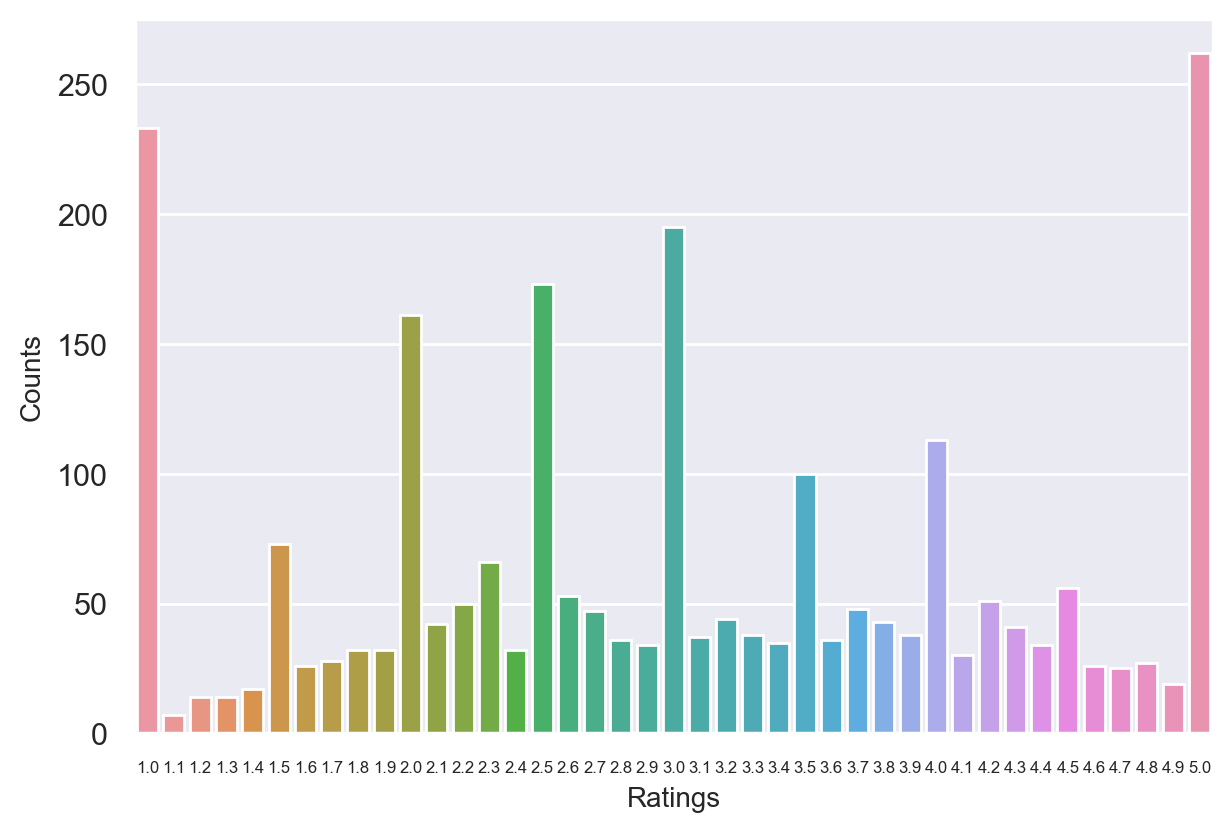

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200
sns.set()
# Explore the rating score
y = df_BOW['rounded_rating'].value_counts()
ax=sns.barplot(x=y.index,y=y)
sns.set(font_scale=0.1)
plt.xlabel('Ratings', fontsize=10)
plt.ylabel('Counts', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
plt.tight_layout()
plt.show()

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_BOW['Target'] = df_BOW['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_BOW['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# Full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_BOW.drop(['Target'],axis =1).iloc[:, 8:], 
                                                    df_BOW['Target'], stratify=df_BOW['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train1))
print("The shape of training/test feature set:", x_train1.shape)
print("The length of testing  set:", len(x_test1))

The length of training set: 1974
The shape of training/test feature set: (1974, 300)
The length of testing  set: 494


#### Create training data and test data sets for SVD feature set

In [ ]:
# With SVD for dimensionality reduction

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_bow = df_BOW.drop(['Target'],axis =1).iloc[:, 8:]

var_explained_bow = []
for i in range(2, 300): # max number of components is 300 
    svd_bow = TruncatedSVD(n_components= i)
    svd_bow.fit(X_bow)
    var_explained_bow.append(svd_bow.explained_variance_ratio_.sum())

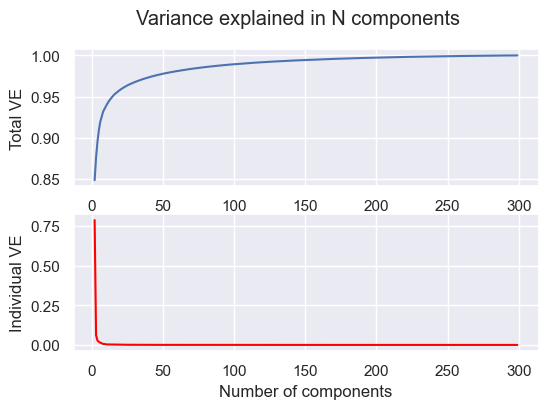

In [ ]:
sns.set()
plt.rcParams['figure.dpi'] = 100
# Plot the variance explained 
x_axis_bow = [i for i in range(2, 300)]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Variance explained in N components')
ax1.plot(x_axis_bow, var_explained_bow)
ax1.set(ylabel="Total VE")
ax2.plot(x_axis_bow, svd_bow.explained_variance_ratio_[:-1],color='red')
plt.xlabel("Number of components")
plt.ylabel("Individual VE")
plt.show()

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 95% of the variance
# with a threshold if variance explained ≥0.95
sv_thre_bow=min([i+2 for i in range(len(var_explained_bow)) if var_explained_bow[i] > 0.95]) # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.9 variance explained is {sv_thre_bow}' )
print(f"Variance Explained with {sv_thre_bow} SVs:", var_explained_bow[sv_thre_bow-2])

The minimum number of components that has greater than or equal to 0.9 variance explained is 15
Variance Explained with 15 SVs: 0.9509480103277417


In [ ]:
# Based on the threshold above
svd_bow = TruncatedSVD(n_components= sv_thre_bow)
svd_bow.fit(X_bow)
X_svd_bow = svd_bow.transform(X_bow)
X_svd_bow.shape

(2468, 15)

In [ ]:
x_train1_svd, x_test1_svd, y_train1_svd, y_test1_svd = train_test_split(X_svd_bow
                            ,df_BOW['Target'], stratify=df_BOW['Target']
                            ,test_size=0.2, random_state=666)
print(f"The length of training set: {len(x_train1_svd)}")
print(f"The shape of training/test feature set: {x_train1_svd.shape}")
print(f"The length of testing  set: {len(x_test1_svd)}")

The length of training set: 1974
The shape of training/test feature set: (1974, 15)
The length of testing  set: 494


#### Define three classifiers with hyperparameter tuning

In [ ]:
# Three classifiers

In [ ]:
# use GridsearchCV tuning the hyper-parameter for SVM
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_SVM(x_train, x_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    skf = StratifiedKFold(n_splits=10, random_state = 666, shuffle=True)
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=2, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(x_train, y_train)

    print ('Best score: %0.4f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
         print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(x_test)
    print (classification_report(y_test, predictions))

param_grid_svm = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 

In [ ]:
# for Random forest
def grid_search_rf(x_train, x_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    clf = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=10, random_state = 666, shuffle=True)  
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(x_train, y_train)

    print ('Best score: %0.4f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
        print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(x_test)
    print (classification_report(y_test, predictions))
    
param_grid_rf = {
    'min_samples_split': [90, 120, 150],
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 5, 8, 10],
    'max_features':['sqrt','log2']
}
    

In [ ]:
# for Gradient Boosting

def grid_search_g_boost(x_train, x_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    gbc = GradientBoostingClassifier()
    grid_search = GridSearchCV(gbc, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(x_train, y_train)

    print ('Best score: %0.4f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
        print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(x_test)
    print (classification_report(y_test, predictions))
    
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500,1000],
    'max_features' : ['sqrt','log2']
}

#### Train BOW without SVD

In [ ]:
# BOW Without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train1, x_test1, y_train1, y_test1, param_grid_svm)
print('-'*60)
print('Random Forest:')
%time grid_search_rf(x_train1, x_test1, y_train1, y_test1, param_grid_rf)
print('-'*60)
print('Gradient Boosting:')
%time grid_search_g_boost(x_train1, x_test1, y_train1, y_test1, param_grid_gb)

SVM:
Fitting 2 folds for each of 64 candidates, totalling 128 fits
Best score: 0.8430
Best parameters set:
	C: 1
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       273
           1       0.80      0.88      0.84       221

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

CPU times: total: 1.52 s
Wall time: 4.53 s
------------------------------------------------------------
Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8587
Best parameters set:
	max_depth: 10
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       273
           1       0.89      0.71      0.79       221

    accuracy                           0.83       494
   macro avg 

In [ ]:
# Use the tuned hyper-parameter to fit the svm model
bow_svm = SVC(C = 0.1, gamma = 1, kernel = 'linear')
bow_svm.fit(x_train1,y_train1)
y_predict_svm_bow = bow_svm.predict(x_test1)

print(bow_svm.score (x_test1 ,y_test1))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table_bow  = {}
scores = dict()
scores['precision'] = precision_score(y_test1, y_predict_svm_bow)
scores['recall'] = recall_score(y_test1, y_predict_svm_bow)
scores['accuracy'] = accuracy_score(y_test1, y_predict_svm_bow)
scores['f1'] = f1_score(y_test1, y_predict_svm_bow)
table_bow['SVM with full bow feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test1, y_predict_svm_bow),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8663967611336032


,Predicted 0,Predicted 1
True 0,239,34
True 1,32,189


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
bow_rf = RandomForestClassifier(n_estimators=200, min_samples_split =90, 
                                oob_score = True, max_depth = 10, max_features = 'sqrt', random_state = 666)

bow_rf.fit (x_train1, y_train1)


print(bow_rf.score (x_test1,y_test1))

y_predict_rf_bow = bow_rf.predict(x_test1)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test1, y_predict_rf_bow)
scores['recall'] = recall_score(y_test1, y_predict_rf_bow)
scores['accuracy'] = accuracy_score(y_test1, y_predict_rf_bow)
scores['f1'] = f1_score(y_test1, y_predict_rf_bow)
table_bow['RF with full bow feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test1, y_predict_rf_bow),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8319838056680162


,Predicted 0,Predicted 1
True 0,254,19
True 1,64,157


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
bow_gb = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=200,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
bow_gb.fit(x_train1,y_train1)
y_predict_gb_bow = bow_gb.predict(x_test1)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test1, y_predict_gb_bow)
scores['recall'] = recall_score(y_test1, y_predict_gb_bow)
scores['accuracy'] = accuracy_score(y_test1,y_predict_gb_bow)
scores['f1'] = f1_score(y_test1, y_predict_gb_bow)
table_bow['GB with full bow feature set'] = scores

print(bow_gb.score (x_test1,y_test1))

pd.DataFrame(    
             confusion_matrix(y_test1, y_predict_gb_bow),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8603238866396761


,Predicted 0,Predicted 1
True 0,246,27
True 1,42,179


#### Train BOW with SVD

In [ ]:
# with SVD


In [ ]:
print('SVM:')
%time grid_search_SVM(x_train1_svd, x_test1_svd, y_train1_svd, y_test1_svd, param_grid_svm)

SVM:
Fitting 2 folds for each of 64 candidates, totalling 128 fits
Best score: 0.8328
Best parameters set:
	C: 1
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       273
           1       0.82      0.78      0.80       221

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494

CPU times: total: 2 s
Wall time: 6min 9s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train1_svd, x_test1_svd, y_train1_svd, y_test1_svd, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8171
Best parameters set:
	max_depth: 8
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 300
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       273
           1       0.83      0.71      0.76       221

    accuracy                           0.80       494
   macro avg       0.81      0.79      0.80       494
weighted avg       0.80      0.80      0.80       494

CPU times: total: 1.73 s
Wall time: 22 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train1_svd, x_test1_svd, y_train1_svd, y_test1_svd, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8420
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       273
           1       0.81      0.81      0.81       221

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494

CPU times: total: 1.38 s
Wall time: 26.9 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm svd model
bow_svm_svd = SVC(C = 1, gamma = 1, kernel = 'linear')
bow_svm_svd.fit(x_train1_svd,y_train1_svd)
y_predict_svm_bow_svd = bow_svm_svd.predict(x_test1_svd)

print(bow_svm_svd.score (x_test1_svd ,y_test1_svd))
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test1_svd, y_predict_svm_bow_svd)
scores['recall'] = recall_score(y_test1_svd, y_predict_svm_bow_svd)
scores['accuracy'] = accuracy_score(y_test1_svd,y_predict_svm_bow_svd)
scores['f1'] = f1_score(y_test1_svd, y_predict_svm_bow_svd)
table_bow['SVM with SVD bow feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test1_svd, y_predict_svm_bow_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8238866396761133


,Predicted 0,Predicted 1
True 0,235,38
True 1,49,172


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
bow_rf_svd = RandomForestClassifier(n_estimators=100, min_samples_split =90, 
                                oob_score = True, max_depth = 8, max_features = 'sqrt', random_state = 66)

bow_rf_svd.fit (x_train1_svd, y_train1_svd)


print(bow_rf_svd.score (x_test1_svd,y_test1_svd))

y_predict_rf_bow_svd = bow_rf_svd.predict(x_test1_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test1_svd, y_predict_rf_bow_svd)
scores['recall'] = recall_score(y_test1_svd, y_predict_rf_bow_svd)
scores['accuracy'] = accuracy_score(y_test1_svd, y_predict_rf_bow_svd)
scores['f1'] = f1_score(y_test1_svd, y_predict_rf_bow_svd)
table_bow['RF with SVD bow feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test1_svd, y_predict_rf_bow_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8097165991902834


,Predicted 0,Predicted 1
True 0,240,33
True 1,61,160


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
bow_gb_svd = GradientBoostingClassifier(min_samples_leaf =1,n_estimators=500,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
bow_gb_svd.fit(x_train1_svd,y_train1_svd)
y_predict_gb_bow_svd = bow_gb_svd.predict(x_test1_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test1_svd, y_predict_gb_bow_svd)
scores['recall'] = recall_score(y_test1_svd, y_predict_gb_bow_svd)
scores['accuracy'] = accuracy_score(y_test1_svd,y_predict_gb_bow_svd)
scores['f1'] = f1_score(y_test1_svd, y_predict_gb_bow_svd)
table_bow['GB with SVD bow feature set'] = scores

print(bow_gb_svd.score (x_test1_svd,y_test1_svd))

pd.DataFrame(    
             confusion_matrix(y_test1_svd, y_predict_gb_bow_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8340080971659919


,Predicted 0,Predicted 1
True 0,235,38
True 1,44,177


#### BOW feature set summary

In [ ]:
bow_performance = pd.DataFrame(table_bow).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
bow_performance

,accuracy,recall,precision,AUC
SVM with full bow feature set,0.866397,0.855204,0.847534,0.851351
RF with full bow feature set,0.831984,0.710407,0.892045,0.790932
GB with full bow feature set,0.860324,0.809955,0.868932,0.838407
SVM with SVD bow feature set,0.823887,0.778281,0.819048,0.798144
RF with SVD bow feature set,0.809717,0.723982,0.829016,0.772947
GB with SVD bow feature set,0.844130,0.814480,0.833333,0.823799


In [ ]:
# SVM with full bow feature set is the best model in the BOW feature sets

### TF-IDF

#### Transform the target variable

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_tfidf['Target'] = df_tfidf['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_tfidf['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# Full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_tfidf.drop(['Target'],axis =1).iloc[:, 8:], 
                                                    df_tfidf['Target'], stratify=df_tfidf['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train2))
print("The shape of training/test feature set:", x_train2.shape)
print("The length of testing  set:", len(x_test2))

The length of training set: 1974
The shape of training/test feature set: (1974, 904)
The length of testing  set: 494


#### Create training data and test data sets for SVD feature set

In [ ]:
# With SVD 

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_tfidf = df_tfidf.drop(['Target'],axis =1).iloc[:, 8:]

var_explained_tfidf = []
for i in range(100, 800): 
    svd_tfidf = TruncatedSVD(n_components= i)
    svd_tfidf.fit(X_tfidf)
    var_explained_tfidf.append(svd_tfidf.explained_variance_ratio_.sum())

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 90% of the variance
# with a threshold if variance explained ≥0.9
sv_thre_tfidf=min([i+2 for i in range(len(var_explained_tfidf)) if var_explained_tfidf[i] > 0.9])+100 # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.9 variance explained is {sv_thre_tfidf}' )
print(f"Variance Explained with {sv_thre_tfidf} SVs:", var_explained_tfidf[sv_thre_tfidf-102])

The minimum number of components that has greater than or equal to 0.9 variance explained is 525
Variance Explained with 525 SVs: 0.9000818109649045


In [ ]:
# Based on the threshold above
svd_tfidf = TruncatedSVD(n_components= sv_thre_tfidf)
svd_tfidf.fit(X_tfidf)
X_svd_tfidf = svd_tfidf.transform(X_tfidf)
X_svd_tfidf.shape

(2468, 525)

In [ ]:
x_train2_svd, x_test2_svd, y_train2_svd, y_test2_svd = train_test_split(X_svd_tfidf
                            ,df_tfidf['Target'], stratify=df_tfidf['Target']
                            ,test_size=0.2, random_state=666)
print(f"The length of training set: {len(x_train2_svd)}")
print(f"The shape of training/test feature set: {x_train2_svd.shape}")
print(f"The length of testing  set: {len(x_test2_svd)}")

The length of training set: 1974
The shape of training/test feature set: (1974, 525)
The length of testing  set: 494


#### Train tfidf without SVD

In [ ]:
# tfidf Without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train2, x_test2, y_train2, y_test2, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8713
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       273
           1       0.88      0.83      0.85       221

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494

CPU times: total: 4.33 s
Wall time: 11min 27s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train2, x_test2, y_train2, y_test2, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best score: 0.8506
Best parameters set:
	max_depth: 10
	max_features: 50
	min_samples_split: 90
	n_estimators: 300
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       273
           1       0.90      0.73      0.81       221

    accuracy                           0.84       494
   macro avg       0.85      0.83      0.84       494
weighted avg       0.85      0.84      0.84       494

CPU times: total: 5.89 s
Wall time: 2min 34s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train2, x_test2, y_train2, y_test2, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8627
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 1000
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       273
           1       0.86      0.81      0.84       221

    accuracy                           0.86       494
   macro avg       0.86      0.85      0.85       494
weighted avg       0.86      0.86      0.86       494

CPU times: total: 1.59 s
Wall time: 16.9 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm model
tfidf_svm = SVC(C = 10, gamma = 1, kernel = 'rbf')
tfidf_svm.fit(x_train2,y_train2)
y_predict_svm_tfidf = tfidf_svm.predict(x_test2)

print(tfidf_svm.score (x_test2 ,y_test2))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table_tfidf  = {}
scores = dict()
scores['precision'] = precision_score(y_test2, y_predict_svm_tfidf)
scores['recall'] = recall_score(y_test2, y_predict_svm_tfidf)
scores['accuracy'] = accuracy_score(y_test2, y_predict_svm_tfidf)
scores['f1'] = f1_score(y_test2, y_predict_svm_tfidf)
table_tfidf['SVM with full tfidf feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test2, y_predict_svm_tfidf),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8724696356275303


,Predicted 0,Predicted 1
True 0,248,25
True 1,38,183


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
tfidf_rf = RandomForestClassifier(n_estimators=300, min_samples_split =90, 
                                oob_score = True, max_depth = 10, max_features = 50, random_state = 666)

tfidf_rf.fit (x_train2, y_train2)


print(tfidf_rf.score (x_test2,y_test2))

y_predict_rf_tfidf = tfidf_rf.predict(x_test2)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test2, y_predict_rf_tfidf)
scores['recall'] = recall_score(y_test2, y_predict_rf_tfidf)
scores['accuracy'] = accuracy_score(y_test2, y_predict_rf_tfidf)
scores['f1'] = f1_score(y_test2, y_predict_rf_tfidf)
table_tfidf['RF with full tfidf feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test2, y_predict_rf_tfidf),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8502024291497976


,Predicted 0,Predicted 1
True 0,254,19
True 1,55,166


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
tfidf_gb = GradientBoostingClassifier(min_samples_leaf =1,n_estimators=1000,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
tfidf_gb.fit(x_train2,y_train2)
y_predict_gb_tfidf = tfidf_gb.predict(x_test2)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test2, y_predict_gb_tfidf)
scores['recall'] = recall_score(y_test2, y_predict_gb_tfidf)
scores['accuracy'] = accuracy_score(y_test2,y_predict_gb_tfidf)
scores['f1'] = f1_score(y_test2, y_predict_gb_tfidf)
table_tfidf['GB with full tfidf feature set'] = scores

print(tfidf_gb.score (x_test2,y_test2))

pd.DataFrame(    
             confusion_matrix(y_test2, y_predict_gb_tfidf),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8704453441295547


,Predicted 0,Predicted 1
True 0,250,23
True 1,41,180


#### Train tfidf with SVD

In [ ]:
# with SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train2_svd, x_test2_svd, y_train2_svd, y_test2_svd, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8718
Best parameters set:
	C: 1
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       273
           1       0.88      0.81      0.84       221

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494

CPU times: total: 2.83 s
Wall time: 5min 28s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train2_svd, x_test2_svd, y_train2_svd, y_test2_svd, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best score: 0.8384
Best parameters set:
	max_depth: 8
	max_features: 50
	min_samples_split: 120
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       273
           1       0.86      0.76      0.80       221

    accuracy                           0.84       494
   macro avg       0.84      0.83      0.83       494
weighted avg       0.84      0.84      0.83       494

CPU times: total: 6.81 s
Wall time: 7min 25s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train2_svd, x_test2_svd, y_train2_svd, y_test2_svd, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8566
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 1000
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       273
           1       0.84      0.80      0.82       221

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

CPU times: total: 7.98 s
Wall time: 46.7 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm svd model
tfidf_svm_svd = SVC(C = 1, gamma = 1, kernel = 'rbf')
tfidf_svm_svd.fit(x_train2_svd,y_train2_svd)
y_predict_svm_tfidf_svd = tfidf_svm_svd.predict(x_test2_svd)

print(tfidf_svm_svd.score (x_test2_svd ,y_test2_svd))
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test2_svd, y_predict_svm_tfidf_svd)
scores['recall'] = recall_score(y_test2_svd, y_predict_svm_tfidf_svd)
scores['accuracy'] = accuracy_score(y_test2_svd,y_predict_svm_tfidf_svd)
scores['f1'] = f1_score(y_test2_svd, y_predict_svm_tfidf_svd)
table_tfidf['SVM with SVD tfidf feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test2_svd, y_predict_svm_tfidf_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8623481781376519


,Predicted 0,Predicted 1
True 0,248,25
True 1,43,178


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
tfidf_rf_svd = RandomForestClassifier(n_estimators=200, min_samples_split =120, 
                                oob_score = True, max_depth = 8, max_features = 50, random_state = 666)

tfidf_rf_svd.fit (x_train2_svd, y_train2_svd)


print(tfidf_rf_svd.score (x_test2_svd,y_test2_svd))

y_predict_rf_tfidf_svd = tfidf_rf_svd.predict(x_test2_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test2_svd, y_predict_rf_tfidf_svd)
scores['recall'] = recall_score(y_test2_svd, y_predict_rf_tfidf_svd)
scores['accuracy'] = accuracy_score(y_test2_svd, y_predict_rf_tfidf_svd)
scores['f1'] = f1_score(y_test2_svd, y_predict_rf_tfidf_svd)
table_tfidf['RF with SVD tfidf feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test2_svd, y_predict_rf_tfidf_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8279352226720648


,Predicted 0,Predicted 1
True 0,244,29
True 1,56,165


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
tfidf_gb_svd = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=1000,
                      learning_rate = 0.1,max_features='sqrt' ,random_state = 666)
tfidf_gb_svd.fit(x_train2_svd,y_train2_svd)
y_predict_gb_tfidf_svd = tfidf_gb_svd.predict(x_test2_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test2_svd, y_predict_gb_tfidf_svd)
scores['recall'] = recall_score(y_test2_svd, y_predict_gb_tfidf_svd)
scores['accuracy'] = accuracy_score(y_test2_svd,y_predict_gb_tfidf_svd)
scores['f1'] = f1_score(y_test2_svd, y_predict_gb_tfidf_svd)
table_tfidf['GB with SVD tfidf feature set'] = scores

print(tfidf_gb_svd.score (x_test2_svd,y_test2_svd))

pd.DataFrame(    
             confusion_matrix(y_test2_svd, y_predict_gb_tfidf_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8582995951417004


,Predicted 0,Predicted 1
True 0,244,29
True 1,41,180


#### TF-IDF feature set summary

In [ ]:
tfidf_performance = pd.DataFrame(table_tfidf).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
tfidf_performance

,accuracy,recall,precision,AUC
SVM with full tfidf feature set,0.872470,0.828054,0.879808,0.853147
RF with full tfidf feature set,0.850202,0.751131,0.897297,0.817734
GB with full tfidf feature set,0.870445,0.814480,0.886700,0.849057
SVM with SVD tfidf feature set,0.862348,0.805430,0.876847,0.839623
RF with SVD tfidf feature set,0.827935,0.746606,0.850515,0.795181
GB with SVD tfidf feature set,0.858300,0.814480,0.861244,0.837209


In [ ]:
# SVM with full tfidf feature set is the best model here

### Gloves

#### Transform the target variable

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_glove['Target'] = df_glove['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_glove['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_glove.drop(['Target'],axis =1).iloc[:, 6:], 
                                                    df_glove['Target'], stratify=df_glove['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train3))
print("The shape of training/test feature set:", x_train3.shape)
print("The length of testing  set:", len(x_test3))

The length of training set: 1974
The shape of training/test feature set: (1974, 200)
The length of testing  set: 494


#### Create training data and test data sets for SVD feature set

In [ ]:
# With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_glove = df_glove.drop(['Target'],axis =1).iloc[:, 6:]

var_explained_glove = []
for i in range(2, 200): # max number of components is 200
    svd_glove = TruncatedSVD(n_components= i)
    svd_glove.fit(X_glove)
    var_explained_glove.append(svd_glove.explained_variance_ratio_.sum())

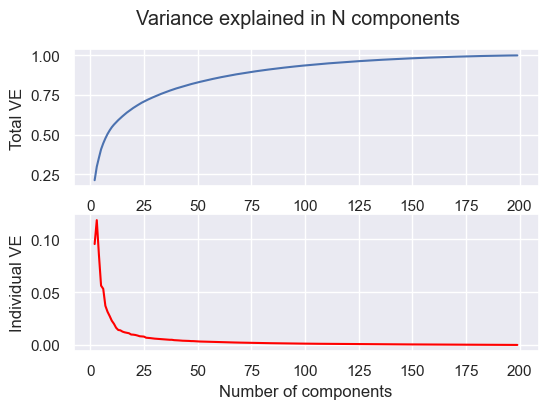

In [ ]:
sns.set()
plt.rcParams['figure.dpi'] = 100
# Plot the variance explained 
x_axis_glove = [i for i in range(2, 200)]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Variance explained in N components')
ax1.plot(x_axis_glove, var_explained_glove)
ax1.set(ylabel="Total VE")
ax2.plot(x_axis_glove, svd_glove.explained_variance_ratio_[:-1],color='red')
plt.xlabel("Number of components")
plt.ylabel("Individual VE")
plt.show()

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 95% of the variance
# with a threshold if variance explained ≥0.9
sv_thre_glove=min([i+2 for i in range(len(var_explained_glove)) if var_explained_glove[i] > 0.9]) # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.9 variance explained is {sv_thre_glove}' )
print(f"Variance Explained with {sv_thre_glove} SVs:", var_explained_glove[sv_thre_glove-2])

The minimum number of components that has greater than or equal to 0.9 variance explained is 78
Variance Explained with 78 SVs: 0.9016946505538659


In [ ]:
# Based on the threshold above
svd_glove = TruncatedSVD(n_components= sv_thre_glove)
svd_glove.fit(X_glove)
X_svd_glove = svd_glove.transform(X_glove)
X_svd_glove.shape

(2468, 78)

In [ ]:
x_train3_svd, x_test3_svd, y_train3_svd, y_test3_svd = train_test_split(X_svd_glove
                            ,df_glove['Target'], stratify=df_glove['Target']
                            ,test_size=0.2, random_state=666)
print(f"The length of training set: {len(x_train3_svd)}")
print(f"The shape of training/test feature set: {x_train3_svd.shape}")
print(f"The length of testing  set: {len(x_test3_svd)}")

The length of training set: 1974
The shape of training/test feature set: (1974, 78)
The length of testing  set: 494


#### Train gloves without SVD

In [ ]:
# Gloves Without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train3, x_test3, y_train3, y_test3, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8891
Best parameters set:
	C: 100
	gamma: 0.01
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       273
           1       0.86      0.80      0.83       221

    accuracy                           0.85       494
   macro avg       0.86      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

CPU times: total: 1.77 s
Wall time: 42 s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train3, x_test3, y_train3, y_test3, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8698
Best parameters set:
	max_depth: 10
	max_features: 'log2'
	min_samples_split: 90
	n_estimators: 300
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       273
           1       0.85      0.77      0.81       221

    accuracy                           0.83       494
   macro avg       0.84      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494

CPU times: total: 2.53 s
Wall time: 46.3 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train3, x_test3, y_train3, y_test3, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8911
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 1000
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       273
           1       0.86      0.87      0.87       221

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

CPU times: total: 2.77 s
Wall time: 24.7 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm model
glove_svm = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
glove_svm.fit(x_train3,y_train3)
y_predict_svm_glove = glove_svm.predict(x_test3)

print(glove_svm.score (x_test3 ,y_test3))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table_glove  = {}
scores = dict()
scores['precision'] = precision_score(y_test3, y_predict_svm_glove)
scores['recall'] = recall_score(y_test3, y_predict_svm_glove)
scores['accuracy'] = accuracy_score(y_test3, y_predict_svm_glove)
scores['f1'] = f1_score(y_test3, y_predict_svm_glove)
table_glove['SVM with full glove feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test3, y_predict_svm_glove),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.854251012145749


,Predicted 0,Predicted 1
True 0,245,28
True 1,44,177


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
glove_rf = RandomForestClassifier(n_estimators=200, min_samples_split =150, 
                                oob_score = True, max_depth = 8, max_features = 'log2', random_state = 666)

glove_rf.fit (x_train3, y_train3)


print(glove_rf.score (x_test3,y_test3))

y_predict_rf_glove = glove_rf.predict(x_test3)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test3, y_predict_rf_glove)
scores['recall'] = recall_score(y_test3, y_predict_rf_glove)
scores['accuracy'] = accuracy_score(y_test3, y_predict_rf_glove)
scores['f1'] = f1_score(y_test3, y_predict_rf_glove)
table_glove['RF with full glove feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test3, y_predict_rf_glove),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8279352226720648


,Predicted 0,Predicted 1
True 0,244,29
True 1,56,165


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
glove_gb = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=1000,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
glove_gb.fit(x_train3,y_train3)
y_predict_gb_glove = glove_gb.predict(x_test3)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test3, y_predict_gb_glove)
scores['recall'] = recall_score(y_test3, y_predict_gb_glove)
scores['accuracy'] = accuracy_score(y_test3,y_predict_gb_glove)
scores['f1'] = f1_score(y_test3, y_predict_gb_glove)
table_glove['GB with full glove feature set'] = scores

print(glove_gb.score (x_test3,y_test3))

pd.DataFrame(    
             confusion_matrix(y_test3, y_predict_gb_glove),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.868421052631579


,Predicted 0,Predicted 1
True 0,241,32
True 1,33,188


#### Train gloves with SVD

In [ ]:
# with SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train3_svd, x_test3_svd, y_train3_svd, y_test3_svd, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8921
Best parameters set:
	C: 1
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       273
           1       0.86      0.83      0.85       221

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494

CPU times: total: 1.34 s
Wall time: 14.8 s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train3_svd, x_test3_svd, y_train3_svd, y_test3_svd, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8348
Best parameters set:
	max_depth: 10
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       273
           1       0.82      0.76      0.79       221

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494

CPU times: total: 1.97 s
Wall time: 32 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train3_svd, x_test3_svd, y_train3_svd, y_test3_svd, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8688
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 1000
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       273
           1       0.86      0.84      0.85       221

    accuracy                           0.87       494
   macro avg       0.87      0.86      0.86       494
weighted avg       0.87      0.87      0.87       494

CPU times: total: 2.72 s
Wall time: 19.7 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm svd model
glove_svm_svd = SVC(C = 1, gamma = 1, kernel = 'rbf')
glove_svm_svd.fit(x_train3_svd,y_train3_svd)
y_predict_svm_glove_svd = glove_svm_svd.predict(x_test3_svd)

print(glove_svm_svd.score (x_test3_svd ,y_test3_svd))
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test3_svd, y_predict_svm_glove_svd)
scores['recall'] = recall_score(y_test3_svd, y_predict_svm_glove_svd)
scores['accuracy'] = accuracy_score(y_test3_svd,y_predict_svm_glove_svd)
scores['f1'] = f1_score(y_test3_svd, y_predict_svm_glove_svd)
table_glove['SVM with SVD glove feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test3_svd, y_predict_svm_glove_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8643724696356275


,Predicted 0,Predicted 1
True 0,244,29
True 1,38,183


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
glove_rf_svd = RandomForestClassifier(n_estimators=300, min_samples_split =90, 
                                oob_score = True, max_depth = 8, max_features = 25, random_state = 666)

glove_rf_svd.fit (x_train3_svd, y_train3_svd)


print(glove_rf_svd.score (x_test3_svd,y_test3_svd))

y_predict_rf_glove_svd = glove_rf_svd.predict(x_test3_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test3_svd, y_predict_rf_glove_svd)
scores['recall'] = recall_score(y_test3_svd, y_predict_rf_glove_svd)
scores['accuracy'] = accuracy_score(y_test3_svd, y_predict_rf_glove_svd)
scores['f1'] = f1_score(y_test3_svd, y_predict_rf_glove_svd)
table_glove['RF with SVD glove feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test3_svd, y_predict_rf_glove_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8421052631578947


,Predicted 0,Predicted 1
True 0,238,35
True 1,43,178


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
glove_gb_svd = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=1000,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
glove_gb_svd.fit(x_train3_svd,y_train3_svd)
y_predict_gb_glove_svd = glove_gb_svd.predict(x_test3_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test3_svd, y_predict_gb_glove_svd)
scores['recall'] = recall_score(y_test3_svd, y_predict_gb_glove_svd)
scores['accuracy'] = accuracy_score(y_test3_svd,y_predict_gb_glove_svd)
scores['f1'] = f1_score(y_test3_svd, y_predict_gb_glove_svd)
table_glove['GB with SVD glove feature set'] = scores

print(glove_gb_svd.score (x_test3_svd,y_test3_svd))

pd.DataFrame(    
             confusion_matrix(y_test3_svd, y_predict_gb_glove_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8744939271255061


,Predicted 0,Predicted 1
True 0,246,27
True 1,35,186


#### Gloves feature set summary

In [ ]:
glove_performance = pd.DataFrame(table_glove).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
glove_performance

,accuracy,recall,precision,AUC
SVM with full glove feature set,0.854251,0.800905,0.863415,0.830986
RF with full glove feature set,0.827935,0.746606,0.850515,0.795181
GB with full glove feature set,0.868421,0.850679,0.854545,0.852608
SVM with SVD glove feature set,0.864372,0.828054,0.863208,0.845266
RF with SVD glove feature set,0.842105,0.805430,0.835681,0.820276
GB with SVD glove feature set,0.874494,0.841629,0.873239,0.857143


In [ ]:
# GB with SVD glove feature set is the best model here

### NER+SA

#### Transform the target variable

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_combined['Target'] = df_combined['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_combined['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train4, x_test4, y_train4, y_test4 = train_test_split(df_combined.drop(['Target'],axis =1).iloc[:, 9:], 
                                                    df_combined['Target'], stratify=df_combined['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train4))
print("The shape of training/test feature set:", x_train4.shape)
print("The length of testing  set:", len(x_test4))

The length of training set: 1974
The shape of training/test feature set: (1974, 7)
The length of testing  set: 494


#### Create training data and test data sets for SVD feature set

In [ ]:
# With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_combined = df_combined.drop(['Target'],axis =1).iloc[:, 9:]

var_explained_combined = []
for i in range(2, 7): # max number of components is 7
    svd_combined = TruncatedSVD(n_components= i)
    svd_combined.fit(X_combined)
    var_explained_combined.append(svd_combined.explained_variance_ratio_.sum())

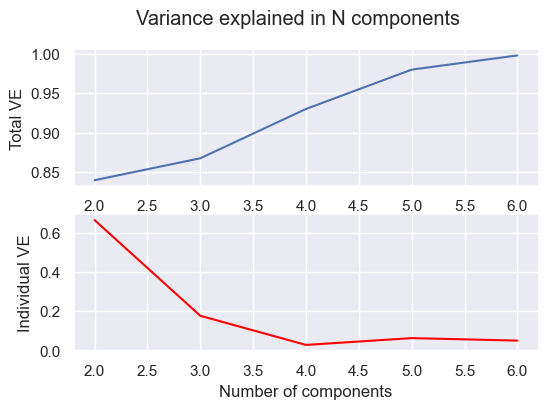

In [ ]:
sns.set()
plt.rcParams['figure.dpi'] = 100
# Plot the variance explained 
x_axis_combined = [i for i in range(2, 7)]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Variance explained in N components')
ax1.plot(x_axis_combined, var_explained_combined)
ax1.set(ylabel="Total VE")
ax2.plot(x_axis_combined, svd_combined.explained_variance_ratio_[:-1],color='red')
plt.xlabel("Number of components")
plt.ylabel("Individual VE")
plt.show()

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 95% of the variance
# with a threshold if variance explained ≥0.9
sv_thre_combined=min([i+2 for i in range(len(var_explained_combined)) if var_explained_combined[i] >= 0.9]) # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.9 variance explained is {sv_thre_combined}' )
print(f"Variance Explained with {sv_thre_combined} SVs:", var_explained_combined[sv_thre_combined-2])

The minimum number of components that has greater than or equal to 0.9 variance explained is 4
Variance Explained with 4 SVs: 0.9299209405413744


In [ ]:
# Based on the threshold above
svd_combined= TruncatedSVD(n_components= sv_thre_combined)
svd_combined.fit(X_combined)
X_svd_combined = svd_combined.transform(X_combined)
X_svd_combined.shape

(2468, 4)

In [ ]:
x_train4_svd, x_test4_svd, y_train4_svd, y_test4_svd = train_test_split(X_svd_combined
                            ,df_combined['Target'], stratify=df_combined['Target']
                            ,test_size=0.2, random_state=666)
print(f"The length of training set: {len(x_train4_svd)}")
print(f"The shape of training/test feature set: {x_train4_svd.shape}")
print(f"The length of testing  set: {len(x_test4_svd)}")

The length of training set: 1974
The shape of training/test feature set: (1974, 4)
The length of testing  set: 494


#### Train NER+SA without SVD

In [ ]:
# NER+SA Without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train4, x_test4, y_train4, y_test4, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8749
Best parameters set:
	C: 100
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       273
           1       0.89      0.88      0.88       221

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

CPU times: total: 1.12 s
Wall time: 19 s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train4, x_test4, y_train4, y_test4, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8723
Best parameters set:
	max_depth: 10
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.90      0.88      0.89       221

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

CPU times: total: 1.36 s
Wall time: 16.5 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train4, x_test4, y_train4, y_test4, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8728
Best parameters set:
	learning_rate: 0.01
	max_features: 'log2'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       273
           1       0.91      0.84      0.87       221

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494

CPU times: total: 297 ms
Wall time: 6.37 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm model
combined_svm = SVC(C = 100, gamma = 1, kernel = 'linear')
combined_svm.fit(x_train4,y_train4)
y_predict_svm_combined = combined_svm.predict(x_test4)

print(combined_svm.score (x_test4 ,y_test4))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table_combined  = {}
scores = dict()
scores['precision'] = precision_score(y_test4, y_predict_svm_combined)
scores['recall'] = recall_score(y_test4, y_predict_svm_combined)
scores['accuracy'] = accuracy_score(y_test4, y_predict_svm_combined)
scores['f1'] = f1_score(y_test4, y_predict_svm_combined)
table_combined['SVM with full NER and SA feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test4, y_predict_svm_combined),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8967611336032388


,Predicted 0,Predicted 1
True 0,248,25
True 1,26,195


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
combined_rf = RandomForestClassifier(n_estimators=200, min_samples_split =90, 
                                oob_score = True, max_depth = 10, max_features = 'sqrt', random_state = 666)

combined_rf.fit (x_train4, y_train4)


print(combined_rf.score (x_test4,y_test4))

y_predict_rf_combined = combined_rf.predict(x_test4)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test4, y_predict_rf_combined)
scores['recall'] = recall_score(y_test4, y_predict_rf_combined)
scores['accuracy'] = accuracy_score(y_test4, y_predict_rf_combined)
scores['f1'] = f1_score(y_test4, y_predict_rf_combined)
table_combined['RF with full NER and SA feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test4, y_predict_rf_combined),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.9008097165991903


,Predicted 0,Predicted 1
True 0,251,22
True 1,27,194


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
combined_gb = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=100,
                      learning_rate = 0.01,max_features='log2' ,random_state = 666)
combined_gb.fit(x_train4,y_train4)
y_predict_gb_combined = combined_gb.predict(x_test4)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test4, y_predict_gb_combined)
scores['recall'] = recall_score(y_test4, y_predict_gb_combined)
scores['accuracy'] = accuracy_score(y_test4,y_predict_gb_combined)
scores['f1'] = f1_score(y_test4, y_predict_gb_combined)
table_combined['GB with full NER and SA feature set'] = scores

print(combined_gb.score (x_test4,y_test4))

pd.DataFrame(    
             confusion_matrix(y_test4, y_predict_gb_combined),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8947368421052632


,Predicted 0,Predicted 1
True 0,254,19
True 1,33,188


#### Train NER+SA with SVD

In [ ]:
# with SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train4_svd, x_test4_svd, y_train4_svd, y_test4_svd, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8592
Best parameters set:
	C: 100
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       273
           1       0.88      0.89      0.88       221

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.90      0.89      0.89       494

CPU times: total: 594 ms
Wall time: 2min 12s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train4_svd, x_test4_svd, y_train4_svd, y_test4_svd, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8470
Best parameters set:
	max_depth: 10
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       273
           1       0.88      0.89      0.88       221

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494

CPU times: total: 984 ms
Wall time: 15.6 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train4_svd, x_test4_svd, y_train4_svd, y_test4_svd, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8546
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       273
           1       0.86      0.89      0.88       221

    accuracy                           0.89       494
   macro avg       0.88      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494

CPU times: total: 281 ms
Wall time: 7.71 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm svd model
combined_svm_svd = SVC(C = 100, gamma = 1, kernel = 'linear')
combined_svm_svd.fit(x_train4_svd,y_train4_svd)
y_predict_svm_combined_svd = combined_svm_svd.predict(x_test4_svd)

print(combined_svm_svd.score (x_test4_svd ,y_test4_svd))
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test4_svd, y_predict_svm_combined_svd)
scores['recall'] = recall_score(y_test4_svd, y_predict_svm_combined_svd)
scores['accuracy'] = accuracy_score(y_test4_svd,y_predict_svm_combined_svd)
scores['f1'] = f1_score(y_test4_svd, y_predict_svm_combined_svd)
table_combined['SVM with SVD NER and SA feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test4_svd, y_predict_svm_combined_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8947368421052632


,Predicted 0,Predicted 1
True 0,245,28
True 1,24,197


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
combined_rf_svd = RandomForestClassifier(n_estimators=200, min_samples_split =90, 
                                oob_score = True, max_depth = 10, max_features = 'sqrt', random_state = 666)

combined_rf_svd.fit (x_train4_svd, y_train4_svd)


print(combined_rf_svd.score (x_test4_svd,y_test4_svd))

y_predict_rf_combined_svd = combined_rf_svd.predict(x_test4_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test4_svd, y_predict_rf_combined_svd)
scores['recall'] = recall_score(y_test4_svd, y_predict_rf_combined_svd)
scores['accuracy'] = accuracy_score(y_test4_svd, y_predict_rf_combined_svd)
scores['f1'] = f1_score(y_test4_svd, y_predict_rf_combined_svd)
table_combined['RF with SVD NER and SA feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test4_svd, y_predict_rf_combined_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8927125506072875


,Predicted 0,Predicted 1
True 0,246,27
True 1,26,195


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
combined_gb_svd = GradientBoostingClassifier(min_samples_leaf =2,n_estimators=100,
                      learning_rate = 0.1,max_features='sqrt' ,random_state = 666)
combined_gb_svd.fit(x_train4_svd,y_train4_svd)
y_predict_gb_combined_svd = combined_gb_svd.predict(x_test4_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test4_svd, y_predict_gb_combined_svd)
scores['recall'] = recall_score(y_test4_svd, y_predict_gb_combined_svd)
scores['accuracy'] = accuracy_score(y_test4_svd,y_predict_gb_combined_svd)
scores['f1'] = f1_score(y_test4_svd, y_predict_gb_combined_svd)
table_combined['GB with SVD NER and SA feature set'] = scores

print(combined_gb_svd.score (x_test4_svd,y_test4_svd))

pd.DataFrame(    
             confusion_matrix(y_test4_svd, y_predict_gb_combined_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.888663967611336


,Predicted 0,Predicted 1
True 0,243,30
True 1,25,196


#### NER+SA feature set summary

In [ ]:
combined_performance = pd.DataFrame(table_combined).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
combined_performance

,accuracy,recall,precision,AUC
SVM with full NER and SA feature set,0.896761,0.882353,0.886364,0.884354
RF with full NER and SA feature set,0.900810,0.877828,0.898148,0.887872
GB with full NER and SA feature set,0.894737,0.850679,0.908213,0.878505
SVM with SVD NER and SA feature set,0.894737,0.891403,0.875556,0.883408
RF with SVD NER and SA feature set,0.892713,0.882353,0.878378,0.880361
GB with SVD NER and SA feature set,0.888664,0.886878,0.867257,0.876957


In [ ]:
# RF with full NER and SA feature set is the best model here

### Topic vectors

#### Transform the target variable

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_tv['Target'] = df_tv['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_tv['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train6, x_test6, y_train6, y_test6 = train_test_split(df_tv.drop(['Target'],axis =1).iloc[:, 5:], 
                                                    df_tv['Target'], stratify=df_tv['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train6))
print("The shape of training/test feature set:", x_train6.shape)
print("The length of testing  set:", len(x_test6))

The length of training set: 1974
The shape of training/test feature set: (1974, 8)
The length of testing  set: 494


#### Testing if SVD is needed

In [ ]:
# With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_tv = df_tv.drop(['Target'],axis =1).iloc[:, 5:]

var_explained_tv = []
for i in range(2, 8): # max number of components is 207
    svd_tv = TruncatedSVD(n_components= i)
    svd_tv.fit(X_tv)
    var_explained_tv.append(svd_tv.explained_variance_ratio_.sum())

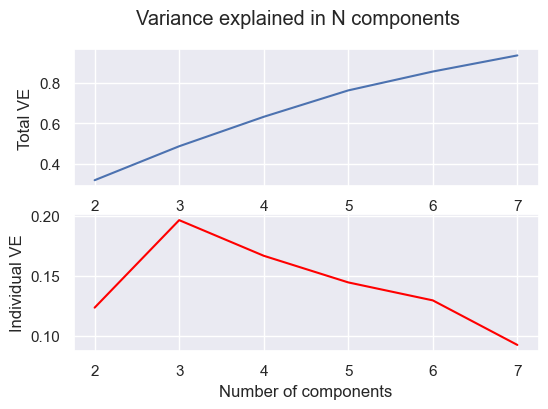

In [ ]:
sns.set()
plt.rcParams['figure.dpi'] = 100
# Plot the variance explained 
x_axis_tv = [i for i in range(2, 8)]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Variance explained in N components')
ax1.plot(x_axis_tv, var_explained_tv)
ax1.set(ylabel="Total VE")
ax2.plot(x_axis_tv, svd_tv.explained_variance_ratio_[:-1],color='red')
plt.xlabel("Number of components")
plt.ylabel("Individual VE")
plt.show()

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 90% of the variance
# with a threshold if variance explained ≥0.9
sv_thre_tv=min([i+2 for i in range(len(var_explained_tv)) if var_explained_tv[i] > 0.90]) # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.9 variance explained is {sv_thre_tv}' )
print(f"Variance Explained with {sv_thre_tv} SVs:", var_explained_tv[sv_thre_tv-2])

The minimum number of components that has greater than or equal to 0.9 variance explained is 7
Variance Explained with 7 SVs: 0.9332704


In [ ]:
# So we don't need to perform SVD in this feature set

#### Train topic vector model without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train6, x_test6, y_train6, y_test6, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8526
Best parameters set:
	C: 100
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       273
           1       0.82      0.74      0.78       221

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

CPU times: total: 781 ms
Wall time: 7.96 s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train6, x_test6, y_train6, y_test6, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8490
Best parameters set:
	max_depth: 5
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       273
           1       0.80      0.74      0.77       221

    accuracy                           0.80       494
   macro avg       0.80      0.79      0.80       494
weighted avg       0.80      0.80      0.80       494

CPU times: total: 1.41 s
Wall time: 18.3 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train6, x_test6, y_train6, y_test6, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8587
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       273
           1       0.82      0.78      0.80       221

    accuracy                           0.83       494
   macro avg       0.83      0.82      0.83       494
weighted avg       0.83      0.83      0.83       494

CPU times: total: 422 ms
Wall time: 9.55 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm model
tv_svm = SVC(C = 100, gamma =1, kernel = 'linear')
tv_svm.fit(x_train6,y_train6)
y_predict_svm_tv = tv_svm.predict(x_test6)

print(tv_svm.score (x_test6 ,y_test6))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'AUC']
table_tv  = {}
scores = dict()
scores['precision'] = precision_score(y_test6, y_predict_svm_tv)
scores['recall'] = recall_score(y_test6, y_predict_svm_tv)
scores['accuracy'] = accuracy_score(y_test6, y_predict_svm_tv)
scores['AUC'] = sklearn.metrics.roc_auc_score(y_test6, y_predict_svm_tv)
table_tv['SVM with full tv feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test6, y_predict_svm_tv),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8117408906882592


,Predicted 0,Predicted 1
True 0,237,36
True 1,57,164


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
tv_rf = RandomForestClassifier(n_estimators=200, min_samples_split =90, 
                                oob_score = True, max_depth = 5, max_features = 'sqrt', random_state = 666)

tv_rf.fit (x_train6, y_train6)


print(tv_rf.score (x_test6,y_test6))

y_predict_rf_tv = tv_rf.predict(x_test6)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test6, y_predict_rf_tv)
scores['recall'] = recall_score(y_test6, y_predict_rf_tv)
scores['accuracy'] = accuracy_score(y_test6, y_predict_rf_tv)
scores['AUC'] = sklearn.metrics.roc_auc_score(y_test6, y_predict_rf_tv)
table_tv['RF with full tv feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test6, y_predict_rf_tv),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.7975708502024291


,Predicted 0,Predicted 1
True 0,234,39
True 1,61,160


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
tv_gb = GradientBoostingClassifier(min_samples_leaf =20,n_estimators=100,
                      learning_rate = 0.1,max_features='sqrt' ,random_state = 666)
tv_gb.fit(x_train6,y_train6)
y_predict_gb_tv = tv_gb.predict(x_test6)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test6, y_predict_gb_tv)
scores['recall'] = recall_score(y_test6, y_predict_gb_tv)
scores['accuracy'] = accuracy_score(y_test6,y_predict_gb_tv)
scores['AUC'] = sklearn.metrics.roc_auc_score(y_test6, y_predict_gb_tv)
table_tv['GB with full tv feature set'] = scores

print(tv_gb.score (x_test6,y_test6))

pd.DataFrame(    
             confusion_matrix(y_test6, y_predict_gb_tv),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8157894736842105


,Predicted 0,Predicted 1
True 0,233,40
True 1,51,170


#### Topic Vector feature set summary

In [ ]:
tv_performance = pd.DataFrame(table_tv).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
tv_performance

,accuracy,recall,precision,AUC
SVM with full tv feature set,0.811741,0.742081,0.820000,0.805107
RF with full tv feature set,0.797571,0.723982,0.804020,0.790562
GB with full tv feature set,0.815789,0.769231,0.809524,0.811355


In [ ]:
# GB with full tv feature set is the best model here

### Hybrid

#### Transform the target variable

In [ ]:
# Let's create a binary target; these with a review rating score higher than 3 are 1, and 3 or less are 0.  

df_hybrid['Target'] = df_hybrid['rounded_rating'].apply(lambda x: 1 if x > 3 else 0)
df_hybrid['Target'].value_counts()

0    1365
1    1103
Name: Target, dtype: int64

#### Create training data and test data sets for full feature set

In [ ]:
# full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
x_train5, x_test5, y_train5, y_test5 = train_test_split(df_hybrid.drop(['Target'],axis =1).iloc[:, 6:], 
                                                    df_hybrid['Target'], stratify=df_hybrid['Target'],
                                                    test_size=0.2, random_state=666) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(x_train5))
print("The shape of training/test feature set:", x_train5.shape)
print("The length of testing  set:", len(x_test5))

The length of training set: 1974
The shape of training/test feature set: (1974, 207)
The length of testing  set: 494


#### Create training data and test data sets for SVD feature set

In [ ]:
# With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X_hybrid = df_hybrid.drop(['Target'],axis =1).iloc[:, 6:]

var_explained_hybrid = []
for i in range(2, 207): # max number of components is 207
    svd_hybrid = TruncatedSVD(n_components= i)
    svd_hybrid.fit(X_hybrid)
    var_explained_hybrid.append(svd_hybrid.explained_variance_ratio_.sum())

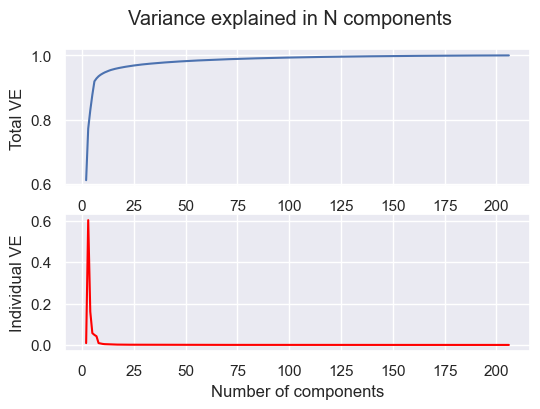

In [ ]:
sns.set()
plt.rcParams['figure.dpi'] = 100
# Plot the variance explained 
x_axis_hybrid = [i for i in range(2, 207)]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Variance explained in N components')
ax1.plot(x_axis_hybrid, var_explained_hybrid)
ax1.set(ylabel="Total VE")
ax2.plot(x_axis_hybrid, svd_hybrid.explained_variance_ratio_[:-1],color='red')
plt.xlabel("Number of components")
plt.ylabel("Individual VE")
plt.show()

In [ ]:
# choose a subset of those components that can explain the most variance, typically at least 95% of the variance
# with a threshold if variance explained ≥0.95
sv_thre_hybrid=min([i+2 for i in range(len(var_explained_hybrid)) if var_explained_hybrid[i] > 0.95]) # +2 since the list starts from 2 components
print(f'The minimum number of components that has greater than or equal to 0.95 variance explained is {sv_thre_hybrid}' )
print(f"Variance Explained with {sv_thre_hybrid} SVs:", var_explained_hybrid[sv_thre_hybrid-2])

The minimum number of components that has greater than or equal to 0.95 variance explained is 13
Variance Explained with 13 SVs: 0.952474987284832


In [ ]:
# Based on the threshold above
svd_hybrid= TruncatedSVD(n_components= sv_thre_hybrid)
svd_hybrid.fit(X_hybrid)
X_svd_hybrid = svd_hybrid.transform(X_hybrid)
X_svd_hybrid.shape

(2468, 13)

In [ ]:
x_train5_svd, x_test5_svd, y_train5_svd, y_test5_svd = train_test_split(X_svd_hybrid
                            ,df_hybrid['Target'], stratify=df_hybrid['Target']
                            ,test_size=0.2, random_state=666)
print(f"The length of training set: {len(x_train5_svd)}")
print(f"The shape of training/test feature set: {x_train5_svd.shape}")
print(f"The length of testing  set: {len(x_test5_svd)}")

The length of training set: 1974
The shape of training/test feature set: (1974, 13)
The length of testing  set: 494


#### Train Hybrid model without SVD

In [ ]:
# hybrid without SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train5, x_test5, y_train5, y_test5, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.9088
Best parameters set:
	C: 100
	gamma: 0.01
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       273
           1       0.90      0.89      0.89       221

    accuracy                           0.91       494
   macro avg       0.91      0.90      0.91       494
weighted avg       0.91      0.91      0.91       494

CPU times: total: 2.02 s
Wall time: 49.2 s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train5, x_test5, y_train5, y_test5, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.9032
Best parameters set:
	max_depth: 10
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       273
           1       0.91      0.83      0.87       221

    accuracy                           0.89       494
   macro avg       0.89      0.88      0.88       494
weighted avg       0.89      0.89      0.89       494

CPU times: total: 1.95 s
Wall time: 45 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train5, x_test5, y_train5, y_test5, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.9068
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       273
           1       0.90      0.90      0.90       221

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

CPU times: total: 922 ms
Wall time: 23.8 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm model
hybrid_svm = SVC(C = 100, gamma =0.01, kernel = 'rbf')
hybrid_svm.fit(x_train5,y_train5)
y_predict_svm_hybrid = hybrid_svm.predict(x_test5)

print(hybrid_svm.score (x_test5 ,y_test5))
# save the result for comparison
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table_hybrid  = {}
scores = dict()
scores['precision'] = precision_score(y_test5, y_predict_svm_hybrid)
scores['recall'] = recall_score(y_test5, y_predict_svm_hybrid)
scores['accuracy'] = accuracy_score(y_test5, y_predict_svm_hybrid)
scores['f1'] = f1_score(y_test5, y_predict_svm_hybrid)
table_hybrid['SVM with full hybrid feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test5, y_predict_svm_hybrid),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.9068825910931174


,Predicted 0,Predicted 1
True 0,252,21
True 1,25,196


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
hybrid_rf = RandomForestClassifier(n_estimators=100, min_samples_split =90, 
                                oob_score = True, max_depth = 10, max_features = 'sqrt', random_state = 666)

hybrid_rf.fit (x_train5, y_train5)


print(hybrid_rf.score (x_test5,y_test5))

y_predict_rf_hybrid = hybrid_rf.predict(x_test5)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test5, y_predict_rf_hybrid)
scores['recall'] = recall_score(y_test5, y_predict_rf_hybrid)
scores['accuracy'] = accuracy_score(y_test5, y_predict_rf_hybrid)
scores['f1'] = f1_score(y_test5, y_predict_rf_hybrid)
table_hybrid['RF with full hybrid feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test5, y_predict_rf_hybrid),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.888663967611336


,Predicted 0,Predicted 1
True 0,253,20
True 1,35,186


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
hybrid_gb = GradientBoostingClassifier(min_samples_leaf =1,n_estimators=200,
                      learning_rate = 0.1,max_features='log2' ,random_state = 666)
hybrid_gb.fit(x_train5,y_train5)
y_predict_gb_hybrid = hybrid_gb.predict(x_test5)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test5, y_predict_gb_hybrid)
scores['recall'] = recall_score(y_test5, y_predict_gb_hybrid)
scores['accuracy'] = accuracy_score(y_test5,y_predict_gb_hybrid)
scores['f1'] = f1_score(y_test5, y_predict_gb_hybrid)
table_hybrid['GB with full hybrid feature set'] = scores

print(hybrid_gb.score (x_test5,y_test5))

pd.DataFrame(    
             confusion_matrix(y_test5, y_predict_gb_hybrid),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.9109311740890689


,Predicted 0,Predicted 1
True 0,250,23
True 1,21,200


#### Train Hybrid model with SVD

In [ ]:
# with SVD

In [ ]:
print('SVM:')
%time grid_search_SVM(x_train5_svd, x_test5_svd, y_train5_svd, y_test5_svd, param_grid_svm)

SVM:
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best score: 0.8921
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'linear'
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       273
           1       0.87      0.87      0.87       221

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

CPU times: total: 609 ms
Wall time: 3min 57s


In [ ]:
print('Random Forest:')
%time grid_search_rf(x_train5_svd, x_test5_svd, y_train5_svd, y_test5_svd, param_grid_rf)

Random Forest:
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score: 0.8566
Best parameters set:
	max_depth: 8
	max_features: 'sqrt'
	min_samples_split: 90
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       273
           1       0.85      0.82      0.83       221

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

CPU times: total: 1.12 s
Wall time: 18.6 s


In [ ]:
print('Gradient Boosting:')
%time grid_search_g_boost(x_train5_svd, x_test5_svd, y_train5_svd, y_test5_svd, param_grid_gb)

Gradient Boosting:
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score: 0.8860
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       273
           1       0.86      0.86      0.86       221

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494

CPU times: total: 906 ms
Wall time: 10.3 s


In [ ]:
# Use the tuned hyper-parameter to fit the svm svd model
hybrid_svm_svd = SVC(C = 10, gamma = 1, kernel = 'linear')
hybrid_svm_svd.fit(x_train5_svd,y_train5_svd)
y_predict_svm_hybrid_svd = hybrid_svm_svd.predict(x_test5_svd)

print(hybrid_svm_svd.score (x_test5_svd ,y_test5_svd))
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test5_svd, y_predict_svm_hybrid_svd)
scores['recall'] = recall_score(y_test5_svd, y_predict_svm_hybrid_svd)
scores['accuracy'] = accuracy_score(y_test5_svd,y_predict_svm_hybrid_svd)
scores['f1'] = f1_score(y_test5_svd, y_predict_svm_hybrid_svd)
table_hybrid['SVM with SVD hybrid feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test5_svd, y_predict_svm_hybrid_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8825910931174089


,Predicted 0,Predicted 1
True 0,244,29
True 1,29,192


In [ ]:
# Use the tuned hyper-parameter to fit the random forest model
hybrid_rf_svd = RandomForestClassifier(n_estimators=200, min_samples_split =90, 
                                oob_score = True, max_depth = 8, max_features = 'sqrt', random_state = 666)

hybrid_rf_svd.fit (x_train5_svd, y_train5_svd)


print(hybrid_rf_svd.score (x_test5_svd,y_test5_svd))

y_predict_rf_hybrid_svd = hybrid_rf_svd.predict(x_test5_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test5_svd, y_predict_rf_hybrid_svd)
scores['recall'] = recall_score(y_test5_svd, y_predict_rf_hybrid_svd)
scores['accuracy'] = accuracy_score(y_test5_svd, y_predict_rf_hybrid_svd)
scores['f1'] = f1_score(y_test5_svd, y_predict_rf_hybrid_svd)
table_hybrid['RF with SVD hybrid feature set'] = scores

pd.DataFrame(    
             confusion_matrix(y_test5_svd, y_predict_rf_hybrid_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.854251012145749


,Predicted 0,Predicted 1
True 0,241,32
True 1,40,181


In [ ]:
# Use the tuned hyper-parameter to fit the Gradient Boosting model
hybrid_gb_svd = GradientBoostingClassifier(min_samples_leaf =1,n_estimators=500,
                      learning_rate = 0.1,max_features='sqrt' ,random_state = 666)
hybrid_gb_svd.fit(x_train5_svd,y_train5_svd)
y_predict_gb_hybrid_svd = hybrid_gb_svd.predict(x_test5_svd)
# save the result for comparison
scores = dict()
scores['precision'] = precision_score(y_test5_svd, y_predict_gb_hybrid_svd)
scores['recall'] = recall_score(y_test5_svd, y_predict_gb_hybrid_svd)
scores['accuracy'] = accuracy_score(y_test5_svd,y_predict_gb_hybrid_svd)
scores['f1'] = f1_score(y_test5_svd, y_predict_gb_hybrid_svd)
table_hybrid['GB with SVD hybrid feature set'] = scores

print(hybrid_gb_svd.score (x_test5_svd,y_test5_svd))

pd.DataFrame(    
             confusion_matrix(y_test5_svd, y_predict_gb_hybrid_svd),
             columns=['Predicted 0', 'Predicted 1'],
             index=['True 0', 'True 1']
)

0.8825910931174089


,Predicted 0,Predicted 1
True 0,246,27
True 1,31,190


#### Hybrid feature set summary

In [ ]:
hybrid_performance = pd.DataFrame(table_hybrid).T[['accuracy','recall', 'precision', 'AUC']]  # transpose and reorder the dataframe
hybrid_performance

,accuracy,recall,precision,AUC
SVM with full hybrid feature set,0.906883,0.886878,0.903226,0.894977
RF with full hybrid feature set,0.888664,0.841629,0.902913,0.871194
GB with full hybrid feature set,0.910931,0.904977,0.896861,0.900901
SVM with SVD hybrid feature set,0.882591,0.868778,0.868778,0.868778
RF with SVD hybrid feature set,0.854251,0.819005,0.849765,0.834101
GB with SVD hybrid feature set,0.882591,0.859729,0.875576,0.867580


In [ ]:
# GB with full hybrid feature set is the best model here

### Overall performance summary

In [ ]:
all_models = [bow_performance, tfidf_performance, glove_performance, 
              combined_performance, tv_performance,hybrid_performance]
performance_summary = pd.concat(all_models)
performance_summary.columns =['Model', 'Accuracy', 'Recall', 'Precision','AUC']
performance_summary.reset_index(drop=True, inplace=True)
index_labels=['Data-driven' for i in range(18)]+['Knowledge-driven' for i in range(9)]+['Hybrid' for i in range(6)]
performance_summary['Type']=index_labels
performance_summary=performance_summary.iloc[:,[5,0,1,2,3,4]]
performance_summary = performance_summary.set_index(['Type', 'Model'])
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
slice_ = ['Accuracy','AUC']
performance_summary.style.apply(highlight_max, props='color:red;', axis=0, subset=slice_)\
.highlight_max(color='blue', axis=0, subset=slice_)

In [ ]:
#  Based on its accuracy score and AUC score, among 33 models, 
#  Gradient Boosting with full hybrid feature set is the best model here